In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu(first_level=1, last_level=4, header="<font color='blus'>Mastering Unsupervised Clustering: Algorithms, Metrics, and Analysis</font>")

In [2]:
import warnings
warnings.filterwarnings("ignore")

# <font color='blus'>What you will learn

> At the end of this course, you will know :
> - What an unsupervized algorithm is
> - What a clustering algorithm is
> - What are popular clustering algorithms, their strengh and their weakness 
> - How to select a metric for clustering
> - How to analyse a cluster

# <font color='blus'> Unsupervized learning

## <font color='blus'> Features transformations

>
> Unsupervized learning algorithms  apply on datasets that are **not labelled**.
>
> Features transformations are categorized as unsupervized learning. 
>
> This is the case for algorithms that scale data.
>
> Scaling is commonly used prior to fitting statistics algorithms. Scaling provides a kind of consistency in the features of a dataset. 
>
> Scaling is particuly relevant for linear machine learning models. Large difference in features values leads to domination of some of them  that lead to bias how the real things are represented by the data model. This is the case for SV(R,M), Logistic Regression, Linear regression or algorithms that make the use of distance calculation, such as the K nearest neighbors. Neural networks falls in this category of algorithms that are sensitive to scale effects.
>
> For algorithms that make use of probabilities distributions, such as Naive Bayes algorithms family, outliers may skew distribution and therefore bias predictions.
>
> Scaling operation consists in to center data (retrieve means or median) and divide the centered data with a number in a such way the scaled data magnitude remains lower then 1. 
>
> In the presence of outliers, the use of `RobustScaler` transformer keep outliers in the distribution while removing outliers effects. 
>
> Effects of scaling on data is shown through data scatter plots. Ability of pandas dataframe for plotting data is intensively used.

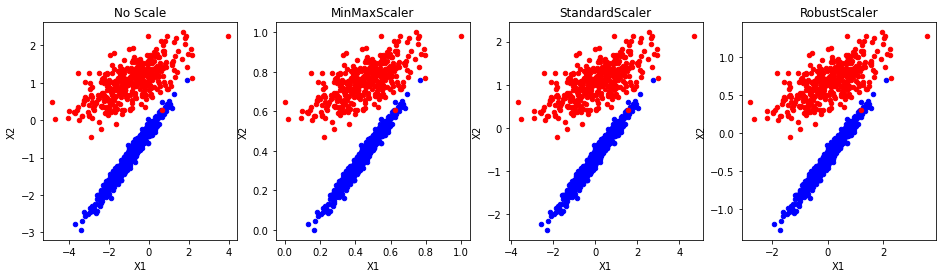

In [3]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import pandas as pd
import matplotlib.pyplot as plt

#--------------------------------------------------------
# Build dataset used for clasification
#--------------------------------------------------------
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
n_clusters_per_class=1, n_informative=2, weights=[0.60], flip_y=0, random_state=4)


#--------------------------------------------------------
# Define plot area : 1 row, 4 columns to plot 
#--------------------------------------------------------
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

#--------------------------------------------------------
# Represent dataset into a pandas dataframe; plot becomes
# easiest.
#--------------------------------------------------------
df_X = pd.DataFrame(data=X, columns=['X1', 'X2'])
df_y = pd.DataFrame(data=y, columns=['target'])
df = pd.concat([df_X, df_y], axis=1, ignore_index=True)

#--------------------------------------------------------
# Rename columns to be more human readable
# Concatenation has effect to remove original columns names.
#--------------------------------------------------------
df.rename(columns={0:'X1',1: 'X2', 2:'target'}, inplace=True)

#--------------------------------------------------------
# Plot scatter with no transformation
#--------------------------------------------------------
ax=df[df['target']==0].plot.scatter(x='X1', y='X2',  ax=axes[0], c='blue')
ax=df[df['target']==1].plot.scatter(x='X1', y='X2',  ax=ax, c='red')
ax.set_title('No Scale')


#--------------------------------------------------------
# Transformation: X1_trans and X2_trans are stacked 
# horizontaly, then a pandas dataframe is created from 
# and scatter is displayed with a title matching with
# data transformation
#--------------------------------------------------------
oMinMaxScaler = MinMaxScaler()
X1_trans = oMinMaxScaler.fit_transform(df_X['X1'].values.reshape((-1,1)))
X2_trans = oMinMaxScaler.fit_transform(df_X['X2'].values.reshape((-1,1)))

X = np.hstack([X1_trans, X2_trans])
df_X = pd.DataFrame(data=X, columns=['X1', 'X2'])
df_y = pd.DataFrame(data=y, columns=['target'])
df = pd.concat([df_X, df_y], axis=1, ignore_index=True)
#--------------------------------------------------------
# Rename columns to be more human readable
#--------------------------------------------------------
df.rename(columns={0:'X1',1: 'X2', 2:'target'}, inplace=True)

#--------------------------------------------------------
# Plot scatter with MinMaxScaler transformation
#--------------------------------------------------------
ax=df[df['target']==0].plot.scatter(x='X1', y='X2',  ax=axes[1], c='blue')
ax=df[df['target']==1].plot.scatter(x='X1', y='X2',  ax=ax, c='red')
ax.set_title('MinMaxScaler')

#--------------------------------------------------------
# Transformation: X1_trans and X2_trans are stacked 
# horizontaly, then a pandas dataframe is created from 
# and scatter is displayed with a title matching with
# data transformation
#--------------------------------------------------------
oStandardScaler = StandardScaler()
X1_trans = oStandardScaler.fit_transform(df_X['X1'].values.reshape((-1,1)))
X2_trans = oStandardScaler.fit_transform(df_X['X2'].values.reshape((-1,1)))

X = np.hstack([X1_trans, X2_trans])
df_X = pd.DataFrame(data=X, columns=['X1', 'X2'])
df_y = pd.DataFrame(data=y, columns=['target'])
df = pd.concat([df_X, df_y], axis=1, ignore_index=True)
#--------------------------------------------------------
# Rename columns to be more human readable
#--------------------------------------------------------
df.rename(columns={0:'X1',1: 'X2', 2:'target'}, inplace=True)
#--------------------------------------------------------
# Plot scatter with StandardScaler transformation
#--------------------------------------------------------
ax=df[df['target']==0].plot.scatter(x='X1', y='X2',  ax=axes[2], c='blue')
ax=df[df['target']==1].plot.scatter(x='X1', y='X2',  ax=ax, c='red')
ax.set_title('StandardScaler')

#--------------------------------------------------------
# Transformation: X1_trans and X2_trans are stacked 
# horizontaly, then a pandas dataframe is created from 
# and scatter is displayed with a title matching with
# data transformation
#--------------------------------------------------------
oRobustScaler = RobustScaler()
X1_trans = oRobustScaler.fit_transform(df_X['X1'].values.reshape((-1,1)))
X2_trans = oRobustScaler.fit_transform(df_X['X2'].values.reshape((-1,1)))

X = np.hstack([X1_trans, X2_trans])
df_X = pd.DataFrame(data=X, columns=['X1', 'X2'])
df_y = pd.DataFrame(data=y, columns=['target'])
df = pd.concat([df_X, df_y], axis=1, ignore_index=True)
#--------------------------------------------------------
# Rename columns to be more human readable
#--------------------------------------------------------
df.rename(columns={0:'X1',1: 'X2', 2:'target'}, inplace=True)
#--------------------------------------------------------
# Plot scatter with RobustScaler transformation
#--------------------------------------------------------
ax=df[df['target']==0].plot.scatter(x='X1', y='X2',  ax=axes[3], c='blue')
ax=df[df['target']==1].plot.scatter(x='X1', y='X2',  ax=ax, c='red')
_=ax.set_title('RobustScaler')


## <font color='blus'> Effetcs of scaling with SVM

> Differents scalers are applied on dataset and SVM, a linear model, is used for the classification task.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC

# Build dataset
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data
                                                    , cancer.target
                                                    , train_size=0.8
                                                    , random_state=13)

estimator = SVC()
estimator.fit(X_train, y_train)
print("Non scaled test set accuracy: {:.2f}".format(estimator.score(X_test, y_test)))

# Min max scaler
scaler = MinMaxScaler()
X_train_trans = scaler.fit_transform(X_train)
estimator = SVC()
estimator.fit(X_train_trans, y_train)
# scoring on the scaled test set
X_test_trans = scaler.transform(X_test)
print("MinMax scaler: test set accuracy: {:.2f}".format(estimator.score(X_test_trans, y_test)))

# Standard scaler
scaler = StandardScaler()
X_train_trans = scaler.fit_transform(X_train)
estimator = SVC()
estimator.fit(X_train_trans, y_train)
# scoring on the scaled test set
X_test_trans = scaler.transform(X_test)
print("Standard scaler: test set accuracy: {:.2f}".format(estimator.score(X_test_trans, y_test)))


# Robust scaler
scaler = RobustScaler()
X_train_trans = scaler.fit_transform(X_train)
estimator = SVC()
estimator.fit(X_train_trans, y_train)
# scoring on the scaled test set
X_test_trans = scaler.transform(X_test)
print("Robust scaler: test set accuracy: {:.2f}".format(estimator.score(X_test_trans, y_test)))

Non scaled test set accuracy: 0.88
MinMax scaler: test set accuracy: 0.98
Standard scaler: test set accuracy: 0.96
Robust scaler: test set accuracy: 0.96


> **Important : the scaler that is trained on train dataset is also used for test dataset.**

In [5]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import datasets
from sklearn.svm import SVC

#---------------------------------------------------------------
# Loading dataset
#---------------------------------------------------------------
bunch_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(bunch_cancer.data
                                                    , bunch_cancer.target
                                                    , train_size=0.6
                                                    , random_state=13)
#---------------------------------------------------------------
# Gridsearch cross-validation
#---------------------------------------------------------------
dict_param={'C':[0.01,0.1, 10, 100]
            ,'kernel':['rbf','sigmoid']
           }
oGridSearchCV = GridSearchCV(SVC(), param_grid = dict_param, cv=StratifiedKFold())
oGridSearchCV.fit(X_train, y_train)

#---------------------------------------------------------------
# Scoring
#---------------------------------------------------------------
print("Best parameters: {}".format(oGridSearchCV.best_params_))
print("No transformation : score= {}".format(oGridSearchCV.score(X_test, y_test)))

#---------------------------------------------------------------
# Standard scaler transformation
#---------------------------------------------------------------
scaler = StandardScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans  = scaler.transform(X_test)

#---------------------------------------------------------------
# Gridsearch cross-validation
#---------------------------------------------------------------
oGridSearchCV = GridSearchCV(SVC(), param_grid = dict_param, cv=StratifiedKFold())
oGridSearchCV.fit(X_train_trans, y_train)

#---------------------------------------------------------------
# Scoring
#---------------------------------------------------------------
print("\nBest parameters: {}".format(oGridSearchCV.best_params_))
print(scaler.__class__.__name__+" transformation : score= {}".format(oGridSearchCV.score(X_test_trans, y_test)))

#---------------------------------------------------------------
# MinMax scaler transformation
#---------------------------------------------------------------
scaler = MinMaxScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans  = scaler.transform(X_test)

#---------------------------------------------------------------
# Gridsearch cross-validation
#---------------------------------------------------------------
oGridSearchCV = GridSearchCV(SVC(), param_grid = dict_param, cv=StratifiedKFold())
oGridSearchCV.fit(X_train_trans, y_train)

#---------------------------------------------------------------
# Scoring
#---------------------------------------------------------------
print("\nBest parameters: {}".format(oGridSearchCV.best_params_))
print(scaler.__class__.__name__+" transformation : score= {}".format(oGridSearchCV.score(X_test_trans, y_test)))

#---------------------------------------------------------------
# Robust scaler transformation
#---------------------------------------------------------------
scaler = RobustScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans  = scaler.transform(X_test)

#---------------------------------------------------------------
# Gridsearch cross-validation
#---------------------------------------------------------------
oGridSearchCV = GridSearchCV(SVC(), param_grid = dict_param, cv=StratifiedKFold())
oGridSearchCV.fit(X_train_trans, y_train)

#---------------------------------------------------------------
# Scoring
#---------------------------------------------------------------
print("\nBest parameters: {}".format(oGridSearchCV.best_params_))
print(scaler.__class__.__name__+" transformation : score= {}".format(oGridSearchCV.score(X_test_trans, y_test)))


Best parameters: {'C': 100, 'kernel': 'rbf'}
No transformation : score= 0.9385964912280702

Best parameters: {'C': 10, 'kernel': 'rbf'}
StandardScaler transformation : score= 0.9517543859649122

Best parameters: {'C': 100, 'kernel': 'rbf'}
MinMaxScaler transformation : score= 0.9473684210526315

Best parameters: {'C': 10, 'kernel': 'rbf'}
RobustScaler transformation : score= 0.9517543859649122


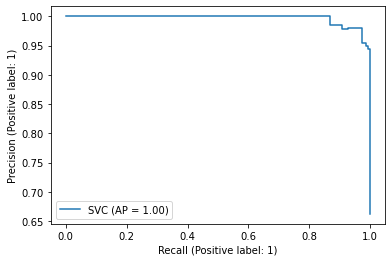

In [7]:
from sklearn.metrics import plot_precision_recall_curve
#---------------------------------------------------------------
# MinMax scaler transformation
#---------------------------------------------------------------
scaler = MinMaxScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans  = scaler.transform(X_test)
svc = SVC(C=10, kernel='rbf', probability=True)
svc.fit(X_train_trans, y_train)
_=plot_precision_recall_curve(svc, X_test_trans, y_test)

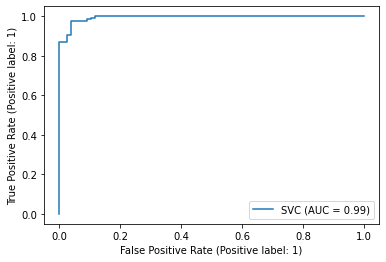

In [8]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

_=plot_roc_curve(svc, X_test_trans, y_test)

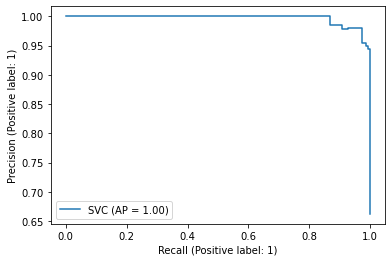

In [9]:
from sklearn.metrics import plot_precision_recall_curve
#---------------------------------------------------------------
# MinMax scaler transformation
#---------------------------------------------------------------
scaler = MinMaxScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans  = scaler.transform(X_test)
svc = SVC(C=10, kernel='rbf')
svc.fit(X_train_trans, y_train)
_=plot_precision_recall_curve(svc, X_test_trans, y_test)

### <font color='blus'> Confusion matrix

Confusion matrix:
[[ 72   5]
 [  4 147]]


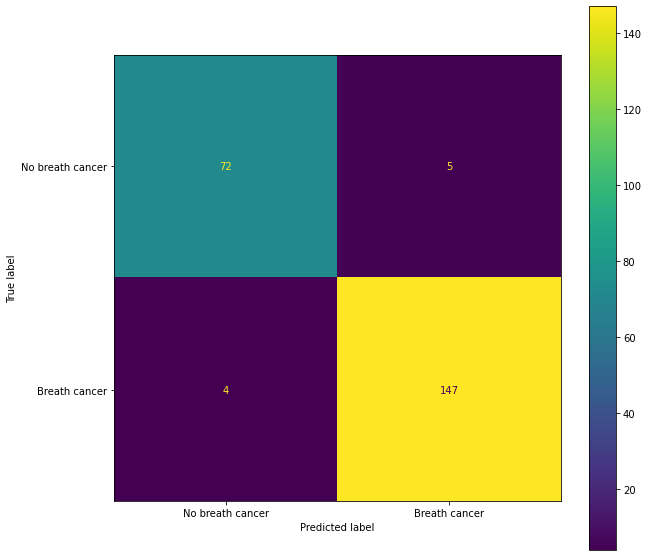

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = svc.predict(X_test_trans)

arr_confmatrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(arr_confmatrix))

cmp = ConfusionMatrixDisplay(arr_confmatrix, display_labels=['No breath cancer', 'Breath cancer'])
fig, ax = plt.subplots(figsize=(10,10))
ax = cmp.plot(ax=ax)

# <font color='blus'>PCA: Principal Components Analysis

> 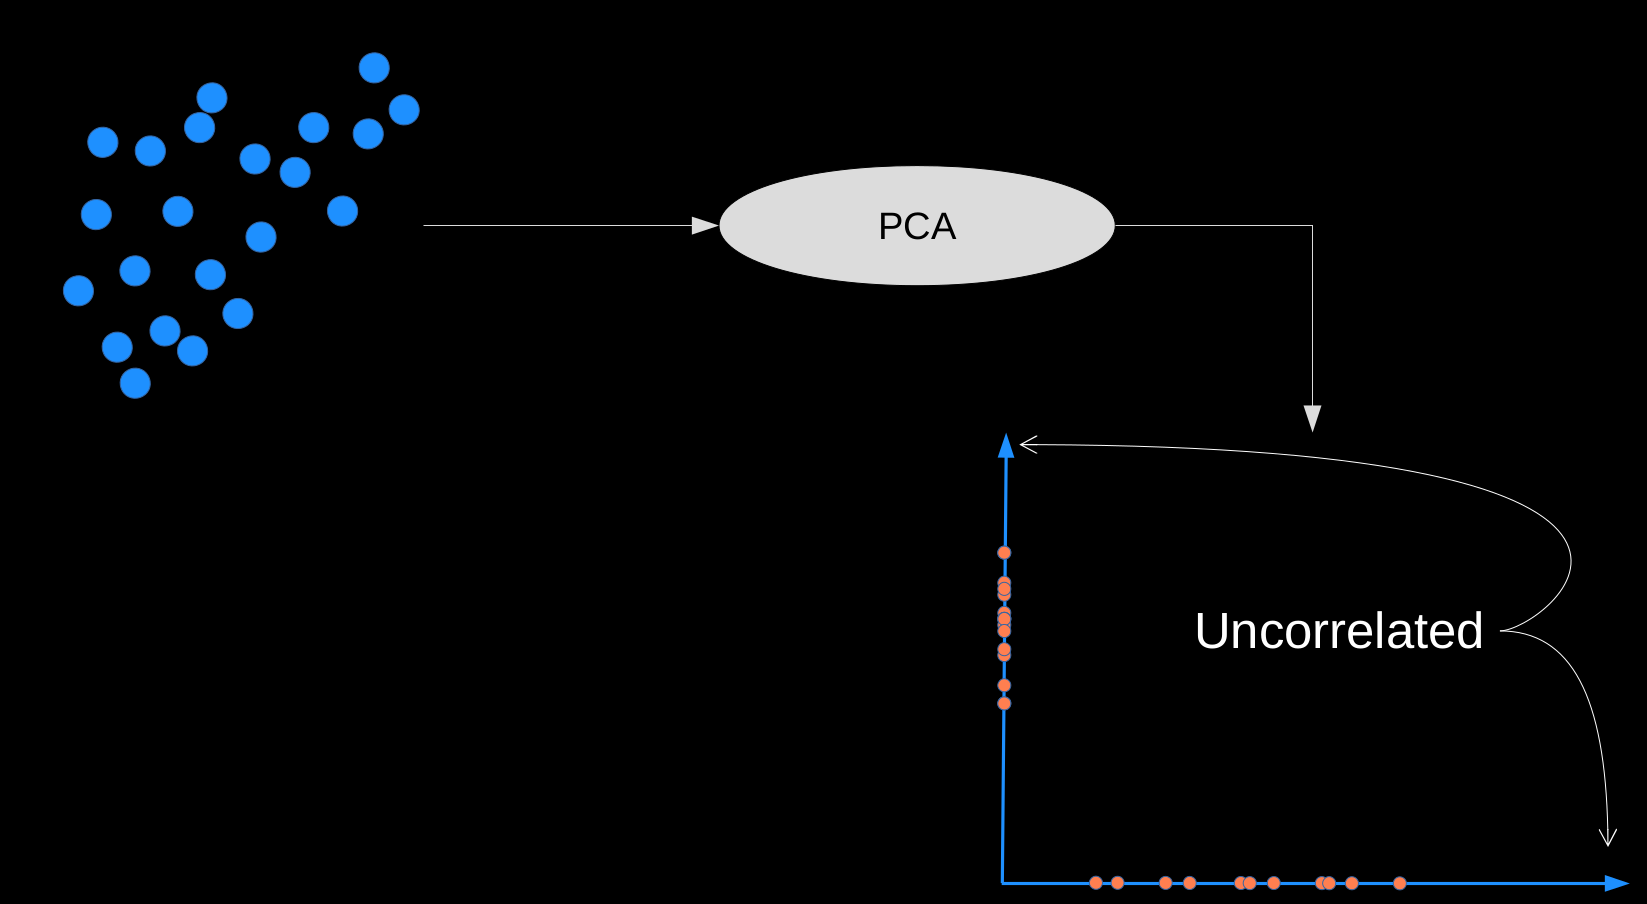

## <font color='blus'>PCA presentation

> PCA allows to describe a given dataset in a coordinate system where variance is maximized along all axis.
>
> First Principal Component is the one where the variance is max along this first axis.
>
> Second Pricipal Component is the one where variance is lesser then in first PC and also greater then other components.
>
> Principal Components are **linear combinations** of original features.
>
> In addition data represented on these axis, these axis, where variance is maximal, are **uncorrelated**. This means that correlation coefficient between these axis are all zero (or closed to).
>
> PCA transformation comes to rotate the dataset from original axis to the one where variance is maximized along each axis.

## <font color='blus'>PCA implementation

> Loading breath cancer dataset

In [11]:
from sklearn.datasets import load_breast_cancer
bunch_cancer = load_breast_cancer()

> **Standardization has to take place before PCA calculation**

In [12]:
from sklearn import preprocessing

X_trans = preprocessing.StandardScaler().fit_transform(bunch_cancer.data)
print(X_trans.shape)

(569, 30)


## <font color='blus'> Display correlation of transformed PCA features

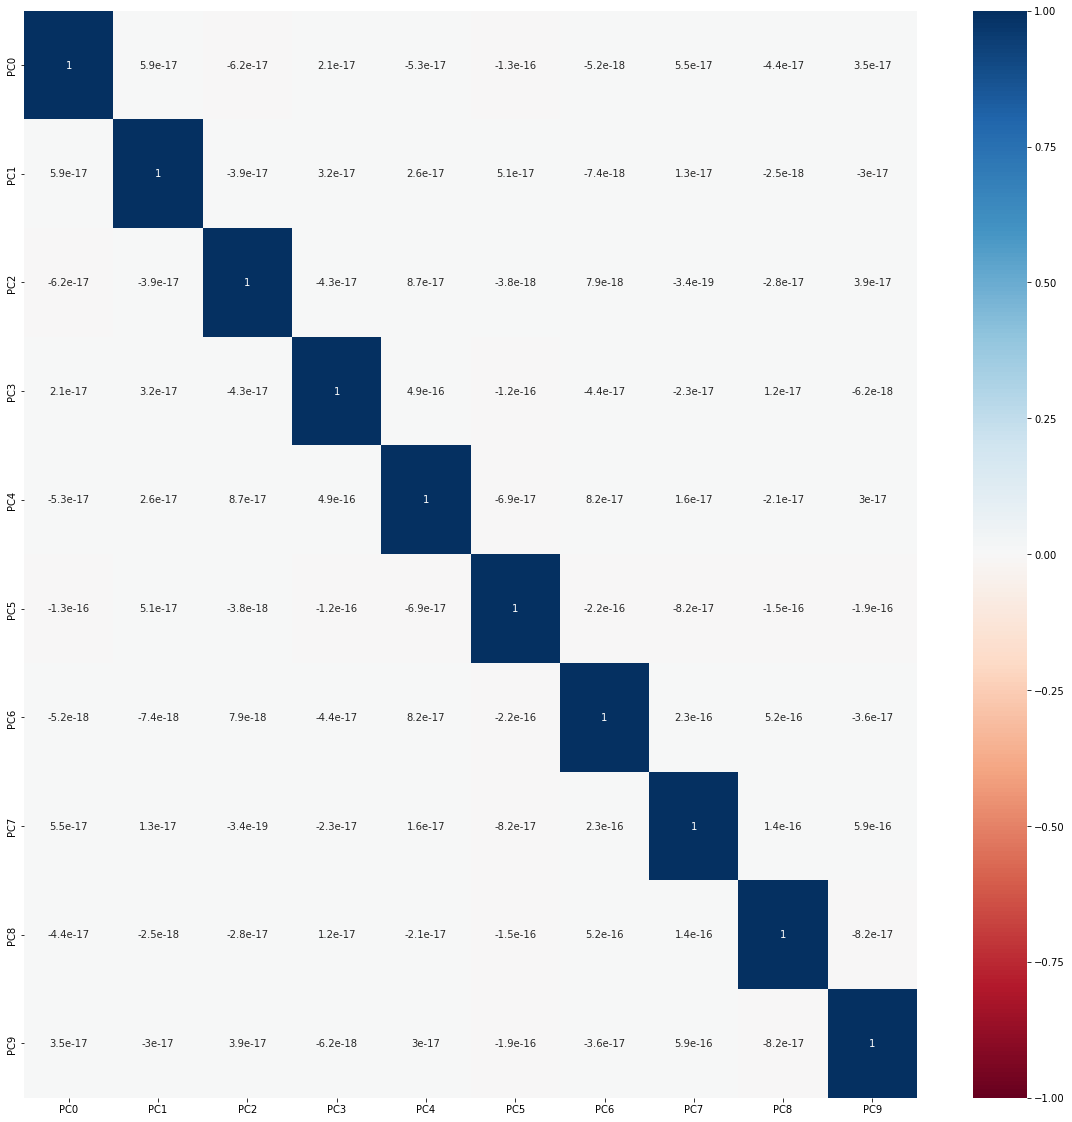

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
n_components=10
oPCA = PCA(n_components= n_components)
X_pca = oPCA.fit_transform(X_trans)

df_corr = pd.DataFrame(data=X_pca, columns=['PC'+str(cp) for cp in range(n_components)]).corr()


plt.figure(figsize=(20,20))
sns.heatmap(df_corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

> PCA transformation leads to uncorrelated new features.

## <font color='blus'> Display features in PCA coordinate system

> The number of components is shifted to 2
>
> Original features are displayed in the **factorial plan**, the plan where 1st and 2nd components stands. 

In [29]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [14]:
from sklearn import decomposition

oPCA = decomposition.PCA(n_components=2)
oPCA = oPCA.fit(X_trans)

(-0.7, 0.7)

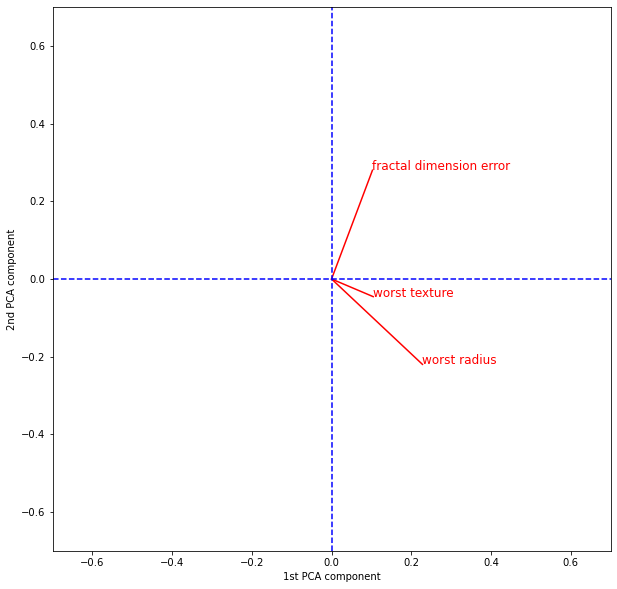

In [15]:
import matplotlib.pyplot as plt

# Get principal components for each data-point
pcs = oPCA.components_

plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    target = bunch_cancer.target[i]
    if 1 == target:
        # Display segment with origin (0,0)
        plt.plot([0, x], [0, y], color='r')
        # Display class in the segment extremity
        plt.text(x, y, bunch_cancer.feature_names[i], fontsize='12', color='red')

# Horizontal plot: y=0
plt.plot([-0.7, 0.7], [0, 0], color='blue', ls='--')

# Vertical plot x=0
plt.plot([0, 0], [-0.7, 0.7], color='blue', ls='--')

plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

> Such diagram allows to understand which are features that contribute the most to Principal Components, therefore, that contribute the most to variance.
>
> This plot also show correlation between `worst texture` and `worst radius` features.

(-0.7, 0.7)

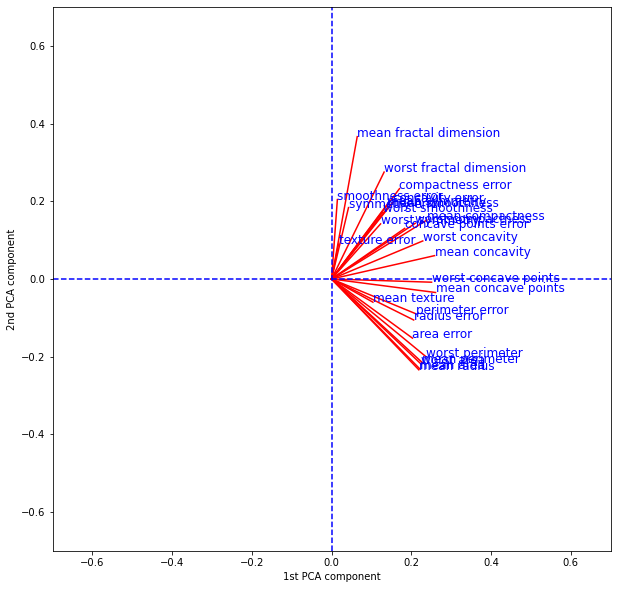

In [16]:
import matplotlib.pyplot as plt

# Get principal components for each data-point
pcs = oPCA.components_

plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    target = bunch_cancer.target[i]
    if 0== target:
        # Display segment with origin (0,0)
        plt.plot([0, x], [0, y], color='r')
        # Display class in the segment extremity
        plt.text(x, y, bunch_cancer.feature_names[i], fontsize='12', color='blue')

# Horizontal plot: y=0
plt.plot([-0.7, 0.7], [0, 0], color='blue', ls='--')

# Vertical plot x=0
plt.plot([0, 0], [-0.7, 0.7], color='blue', ls='--')

plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

## <font color='blus'> Display features in PCA coordonates for none correlated features

> Correlation matrix is computed

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data=X_trans, columns=bunch_cancer.feature_names)
df_corr = df.corr()

> Correlation matrix need to be filtered from to strongly correlated values
>> Figure below shows the correlated values greater or equal 0.9

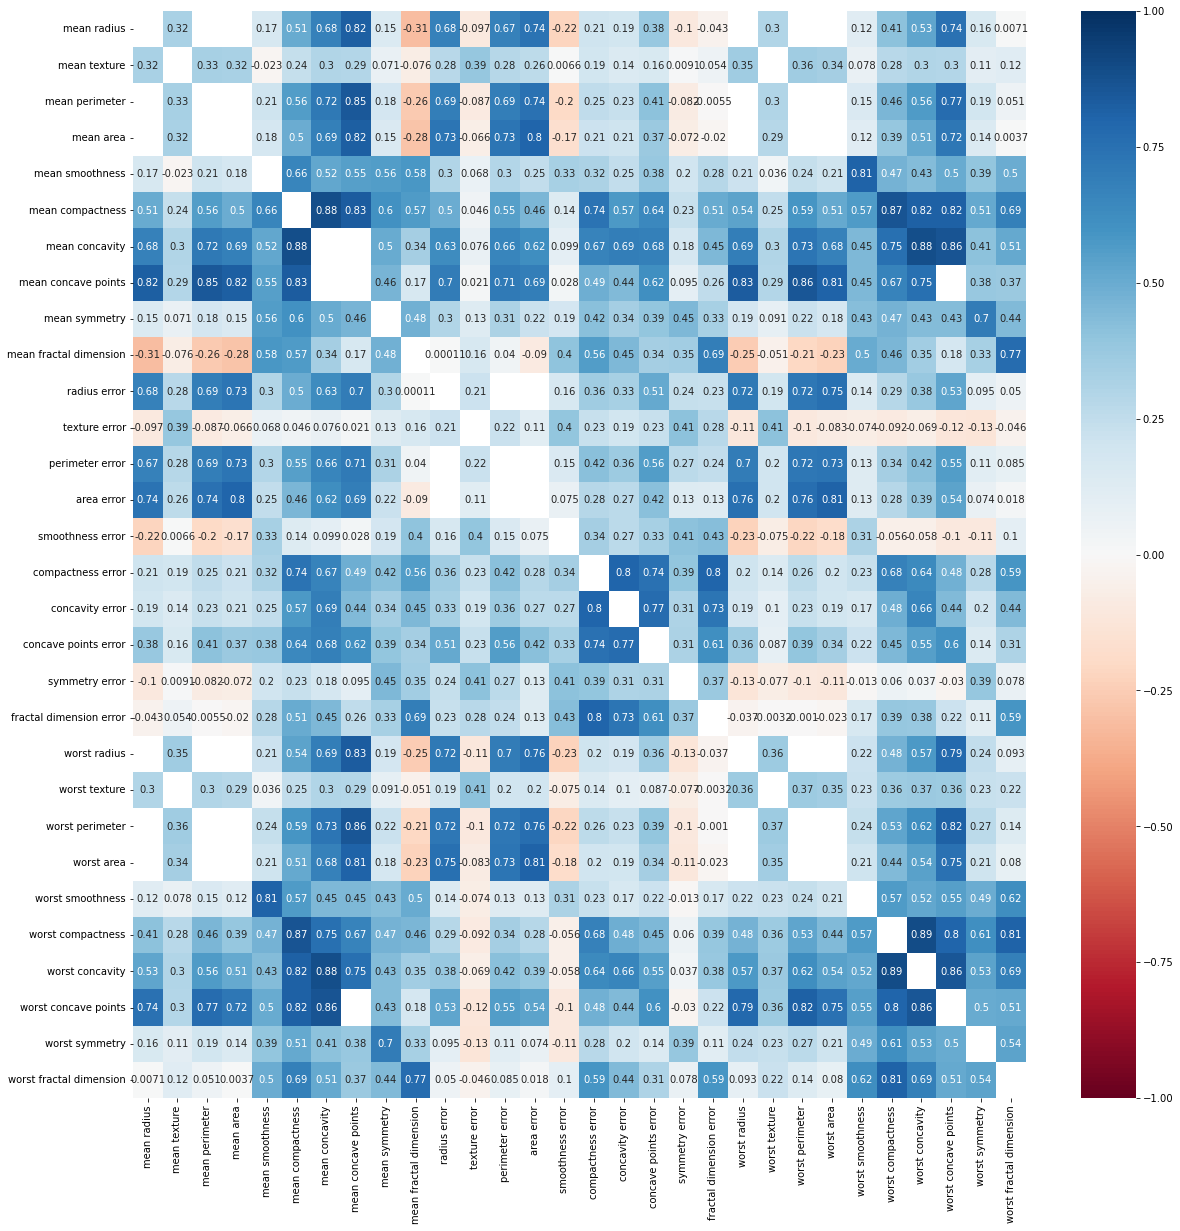

In [18]:
import numpy as np
CORR_THRESHOLD = 0.9

df_corr_inf = df_corr[np.abs(df_corr) < CORR_THRESHOLD]

plt.figure(figsize=(20,20))
sns.heatmap(df_corr_inf, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

> Correlation matrix for correlation coefficient >= `CORR_THRESHOLD` 

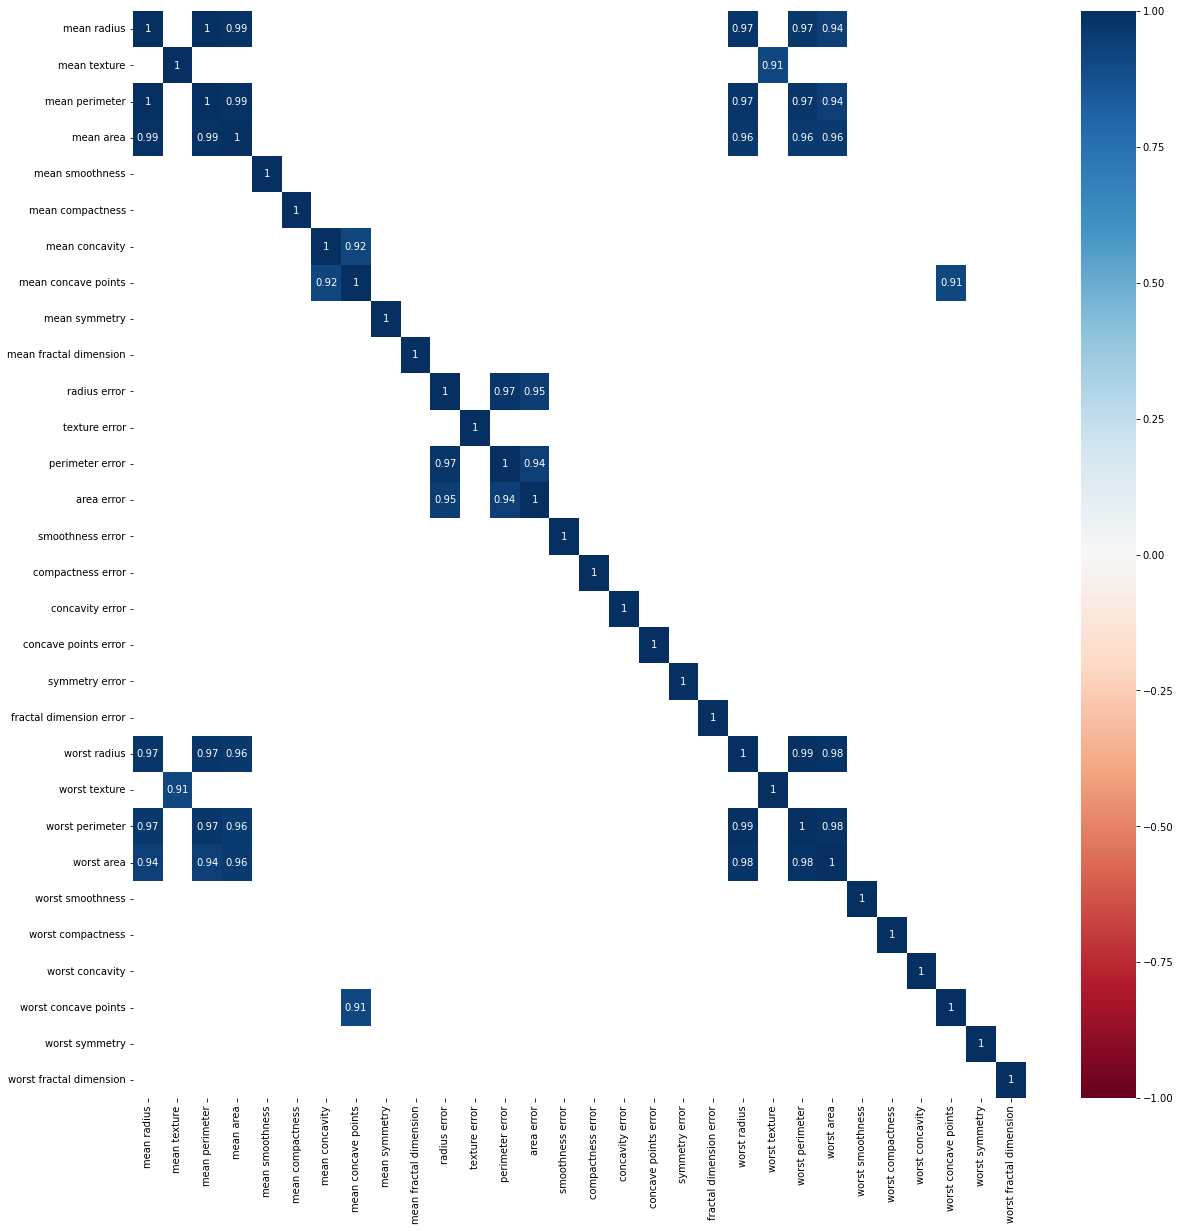

In [19]:
df_corr_sup = df_corr[np.abs(df_corr)>= CORR_THRESHOLD]

plt.figure(figsize=(20,20))
sns.heatmap(df_corr_sup, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

> Removing one of the correlated columns.
>> Correlated features means that information are shared between the features.
>> This shared information is redundant and in linear alogorithm, this duplication of information leads to decrease the algorithm performance beacause a correlated feature contribute twice to a linear coefficient .

In [20]:
nextRow =1
list_col_drop = list()
# Correlation matrix is symetric.
# In correlation dataframe, indexes are also columns name.
for row in df_corr_sup.index :
    # Columns index start with next row
    for column in df_corr_sup.columns[nextRow:] :
        # Column to drop have defined values with row index
        if not np.isnan(df_corr_sup.loc[row, column]):
            # Avoid columns that are already stored
            if column not in list_col_drop:
                list_col_drop.append(column)
    # Next row
    nextRow+=1


In [21]:
len(list_col_drop)
list_col_drop
list_col_keep = [col for col in df_corr.columns if col not in list_col_drop]
print("Number of columns kept= {} / total columns= {}".format(len(list_col_keep), len(df_corr.columns)))

Number of columns kept= 20 / total columns= 30


> Filter dataframe with kept columns, the `list_col_keep` list
>
> The `target` column from `bunch_cancer` dataframe is added in order to use it for the display.

In [22]:
df['target'] = bunch_cancer.target
list_col_keep.append('target')

df_filtered = df[list_col_keep]
df_filtered.shape

(569, 21)

> Apply PCA except for the last column that is the target

In [21]:
from sklearn import decomposition

oPCA = decomposition.PCA(n_components=2)

# Rotate the dataset along with axes of greatest variance
oPCA = oPCA.fit(df_filtered[list_col_keep[:-1]])

(-0.7, 0.7)

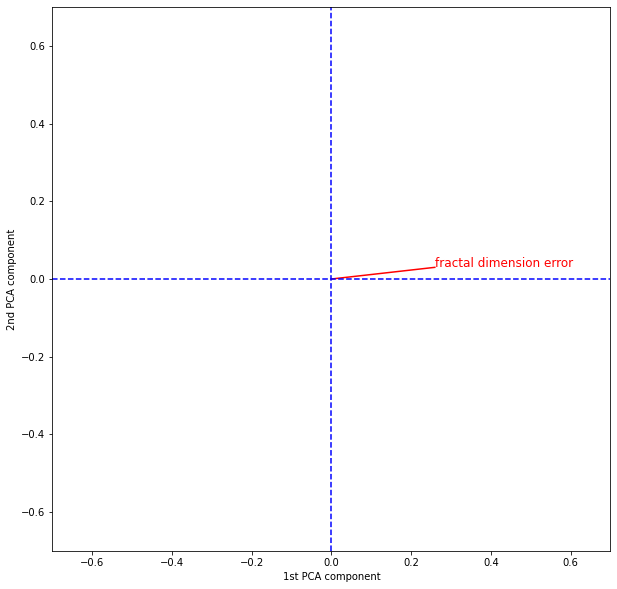

In [22]:
import matplotlib.pyplot as plt
pcs = oPCA.components_

plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    target = df_filtered.target.loc[i]
    if 1 == target:
        # Display segment with origin (0,0)
        plt.plot([0, x], [0, y], color='r')
        # Display class in the segment extremity
        plt.text(x, y, bunch_cancer.feature_names[i], fontsize='12', color='red')

# Horizontal plot: y=0
plt.plot([-0.7, 0.7], [0, 0], color='blue', ls='--')

# Vertical plot x=0
plt.plot([0, 0], [-0.7, 0.7], color='blue', ls='--')

plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

(-0.7, 0.7)

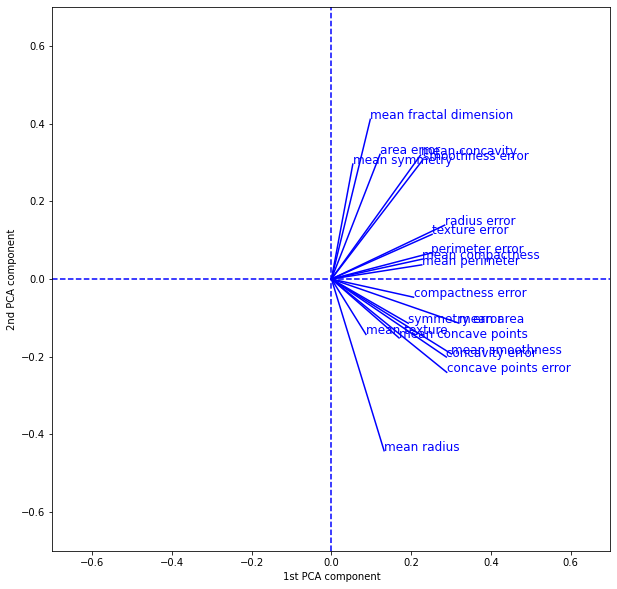

In [23]:
import matplotlib.pyplot as plt
pcs = oPCA.components_

plt.figure(figsize=(10,10))
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    target = df_filtered.target.loc[i]
    if 0 == target:
        # Display segment with origin (0,0)
        plt.plot([0, x], [0, y], color='b')
        # Display class in the segment extremity
        plt.text(x, y, bunch_cancer.feature_names[i], fontsize='12', color='blue')

# Horizontal plot: y=0
plt.plot([-0.7, 0.7], [0, 0], color='blue', ls='--')

# Vertical plot x=0
plt.plot([0, 0], [-0.7, 0.7], color='blue', ls='--')

plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

> These 3 features contribute to discriminate cases with breath cancer.
>
> There is no negative contribution of the features for 1st component. 
>
> For 2nd component, the lowest are `worst_radius` and `worst_texture` the more they contribute to cancer discrimination.
> `worst_radius` and `worst_texture` are correlated but uncorrelated with `fractal_dimension_error`.
>
> These 3 factors positively contribute to the first component. More their magnitude is hight, the higher is the likehood to have cancer.
>
> Second axis opposite `fractal_dimension_error` to others factors.

## <font color='blus'> Logistic regression with original features

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

oLogisticRegression = LogisticRegression()
arr_score = cross_val_score(oLogisticRegression, X_trans, bunch_cancer.target, cv=StratifiedKFold())
print("Average cross-validation score= {}%".format(round(100*arr_score.mean(),2)))

Average cross-validation score= 98.07%


> Display of the confusion matrix

Accuracy score on test dataset= 0.99% with 30 features
Accuracy score on test dataset= 0.99%


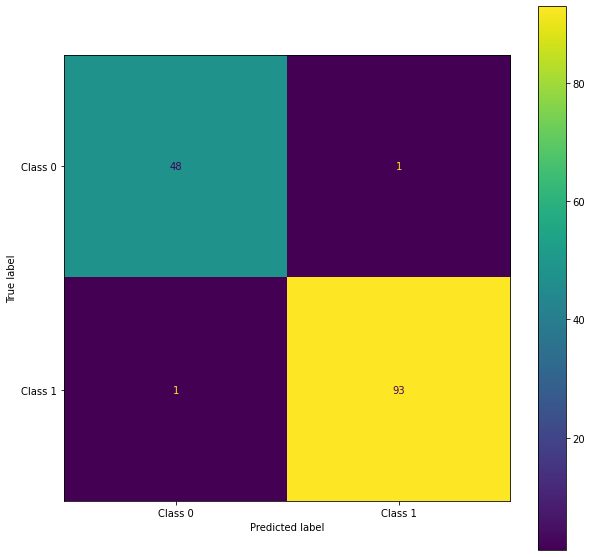

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

X_train, X_test,y_train, y_test \
= train_test_split(bunch_cancer.data, bunch_cancer.target, random_state=13)
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

dict_param = {'C':[1.e-3, 1.e-1, 1., 10., 100., 1000.]}
gscv = GridSearchCV(LogisticRegression()
                    , param_grid = dict_param
                    , cv=StratifiedKFold(n_splits=5))

gscv = gscv.fit(X_train_scale, y_train)
gscv.score(X_test_scale, y_test)

oLogisticRegression = LogisticRegression(**gscv.best_params_)
oLogisticRegression = oLogisticRegression.fit(X_train_scale, y_train)
score = round(oLogisticRegression.score(X_test_scale, y_test), 2)
print("Accuracy score on test dataset= {}% with {} features".format(score,X_train.shape[1] ))
print("Accuracy score on test dataset= {}%".format(score))

y_pred = oLogisticRegression.predict(X_test_scale)
arr_confmatrix = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(arr_confmatrix, display_labels=['Class 0', 'Class 1'])
fig, ax = plt.subplots(figsize=(10,10))
ax = cmp.plot(ax=ax)

> The global accuracy is around 98% with 30 features 

## <font color='blus'> Logistic regression with PCA features

> 2 dimensions over 30 are used

In [32]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


oPCA = PCA(n_components=2)
oPCA.fit(df_filtered[list_col_keep[:-1]])
X_pca= oPCA.transform(df_filtered[list_col_keep[:-1]])

oLogisticRegression = LogisticRegression()
arr_score = cross_val_score(oLogisticRegression, X_pca, df_filtered.target, cv=StratifiedKFold())

print("Average cross-validation score= {}%".format(round(100*arr_score.mean())))
print('\nTotal Variance Explained= {}%'.format(round(sum(list(oPCA.explained_variance_ratio_))*100, 2)))

Average cross-validation score= 91%

Total Variance Explained= 56.06%


> The global accuracy is around 91% with the 2 principal components 

> Display of the confusion matrix

Accuracy score on test dataset= 0.9% with 2 features
Bests parameters= {'C': 10.0}%


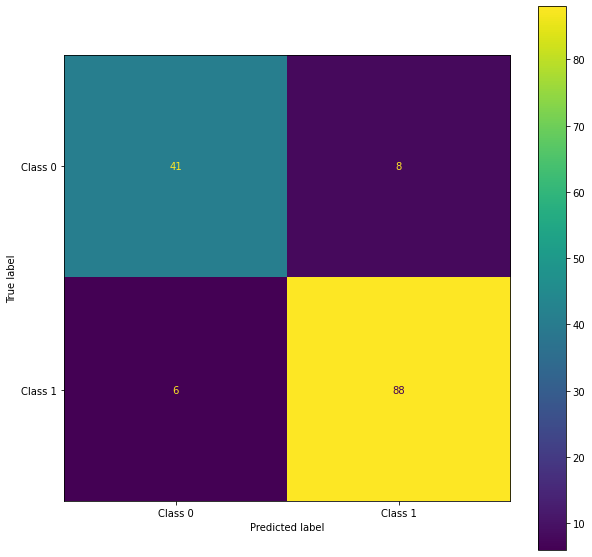

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

X_train, X_test,y_train, y_test \
= train_test_split(X_pca, bunch_cancer.target, random_state=13)
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

dict_param = {'C':[1.e-3, 1.e-1, 1., 10., 100., 1000.]}
gscv = GridSearchCV(LogisticRegression()
                    , param_grid = dict_param
                    , cv=StratifiedKFold(n_splits=5))

gscv = gscv.fit(X_train_scale, y_train)
gscv.score(X_test_scale, y_test)

oLogisticRegression = LogisticRegression(**gscv.best_params_)
oLogisticRegression = oLogisticRegression.fit(X_train_scale, y_train)
score = round(oLogisticRegression.score(X_test_scale, y_test), 2)
print("Accuracy score on test dataset= {}% with {} features".format(score,X_train.shape[1] ))
print("Bests parameters= {}%".format(gscv.best_params_))

y_pred = oLogisticRegression.predict(X_test_scale)
arr_confmatrix = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(arr_confmatrix, display_labels=['Class 0', 'Class 1'])
fig, ax = plt.subplots(figsize=(10,10))
ax = cmp.plot(ax=ax)

> Quizz :
>> Number of FP?
>>
>> Number of FN?
>>
>> F1-score?

In [37]:
from sklearn  import metrics
print("F1-score= {}".format(round(metrics.f1_score(y_test, y_pred),2)))

F1-score= 0.93


> **What is the proper number of principal components to get an high performance?**

In [42]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


oPCA = PCA(n_components=10)
oPCA.fit(df_filtered[list_col_keep[:-1]])
X_pca= oPCA.transform(df_filtered[list_col_keep[:-1]])

oLogisticRegression = LogisticRegression()
arr_score = cross_val_score(oLogisticRegression, X_pca, df_filtered.target, cv=StratifiedKFold())

print("Average cross-validation score= {}%".format(round(100*arr_score.mean())))
print('\nTotal Variance Explained= {}%'.format(round(sum(list(oPCA.explained_variance_ratio_))*100, 2)))

Average cross-validation score= 97%

Total Variance Explained= 94.88%


> Understanding effects of variance explanation

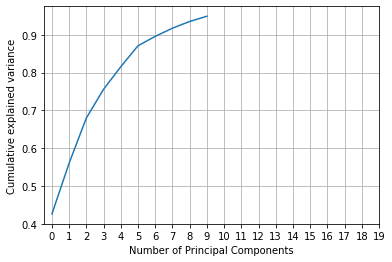

In [43]:
import numpy as np

plt.plot(np.cumsum(oPCA.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance');
plt.grid(True)
# Remove the last column from dataset, it contains the target
_=plt.xticks([i for i in range(0,df_filtered.shape[1]-1)])

## <font color='blus'> Logistic regression with more PCA explained variance

In [44]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold


oPCA = PCA(n_components=20)
oPCA.fit(df_filtered[list_col_keep[:-1]])
X_pca= oPCA.transform(df_filtered[list_col_keep[:-1]])

oLogisticRegression = LogisticRegression()
arr_score = cross_val_score(oLogisticRegression, X_pca, df_filtered.target, cv=StratifiedKFold())

print("Average cross-validation score= {}%".format(round(100*arr_score.mean())))
print('\nTotal Variance Explained= {}%'.format(round(sum(list(oPCA.explained_variance_ratio_))*100, 2)))

Average cross-validation score= 97%

Total Variance Explained= 100.0%


> Display of the confusion matrix

Bests parameters= {'C': 1.0}%
Accuracy score on test dataset= 0.97% with 20 features


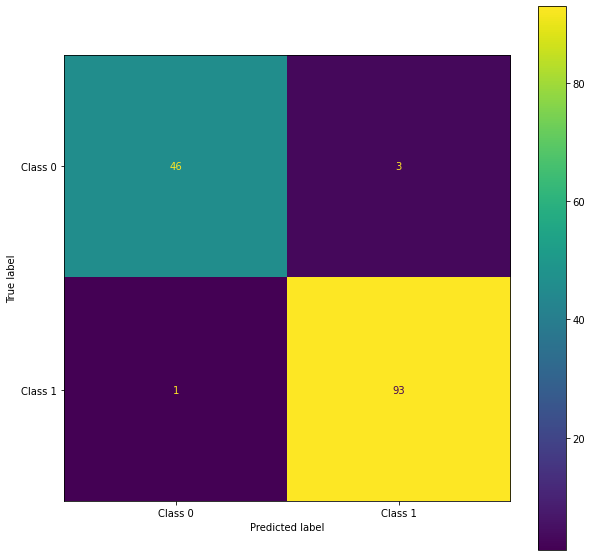

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

X_train, X_test,y_train, y_test \
= train_test_split(X_pca, bunch_cancer.target, random_state=13)
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

dict_param = {'C':[1.e-3, 1.e-1, 1., 10., 100., 1000.]}
gscv = GridSearchCV(LogisticRegression()
                    , param_grid = dict_param
                    , cv=StratifiedKFold(n_splits=5))

gscv = gscv.fit(X_train_scale, y_train)
gscv.score(X_test_scale, y_test)

oLogisticRegression = LogisticRegression(**gscv.best_params_)
oLogisticRegression = oLogisticRegression.fit(X_train_scale, y_train)
score = round(oLogisticRegression.score(X_test_scale, y_test), 2)
print("Bests parameters= {}%".format(gscv.best_params_))
print("Accuracy score on test dataset= {}% with {} features".format(score,X_train.shape[1] ))

y_pred = oLogisticRegression.predict(X_test_scale)
arr_confmatrix = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(arr_confmatrix, display_labels=['Class 0', 'Class 1'])
fig, ax = plt.subplots(figsize=(10,10))
ax = cmp.plot(ax=ax)

## <font color='blus'> Linear regression with less correlated features

In [47]:
ser_target = df_filtered['target'].copy()
del(df_filtered['target'])

In [48]:
df_filtered.columns

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concavity', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

Bests parameters= {'C': 1.0}%
Accuracy score on test dataset= 0.97% with 20 features


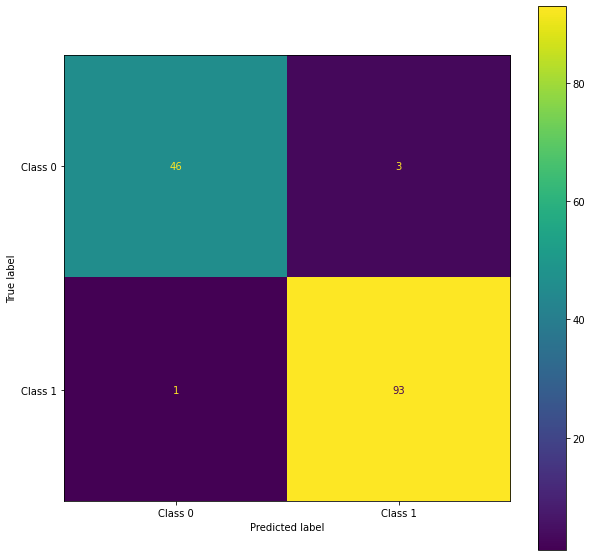

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

X_train, X_test,y_train, y_test \
= train_test_split(df_filtered.values, ser_target, random_state=13)
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

dict_param = {'C':[1.e-3, 1.e-1, 1., 10., 100., 1000.]}
gscv = GridSearchCV(LogisticRegression()
                    , param_grid = dict_param
                    , cv=StratifiedKFold(n_splits=5))

gscv = gscv.fit(X_train_scale, y_train)
gscv.score(X_test_scale, y_test)

oLogisticRegression = LogisticRegression(**gscv.best_params_)
oLogisticRegression = oLogisticRegression.fit(X_train_scale, y_train)
score = round(oLogisticRegression.score(X_test_scale, y_test), 2)
print("Bests parameters= {}%".format(gscv.best_params_))
print("Accuracy score on test dataset= {}% with {} features".format(score,X_train.shape[1] ))

y_pred = oLogisticRegression.predict(X_test_scale)
arr_confmatrix = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(arr_confmatrix, display_labels=['Class 0', 'Class 1'])
fig, ax = plt.subplots(figsize=(10,10))
ax = cmp.plot(ax=ax)

> 20 dimensions over 30 are used

###  <font color='blues'> ROC curve

Best Threshold=1, G-mean score=0.964 
(FPR, TPR)=(0.061,0.989)


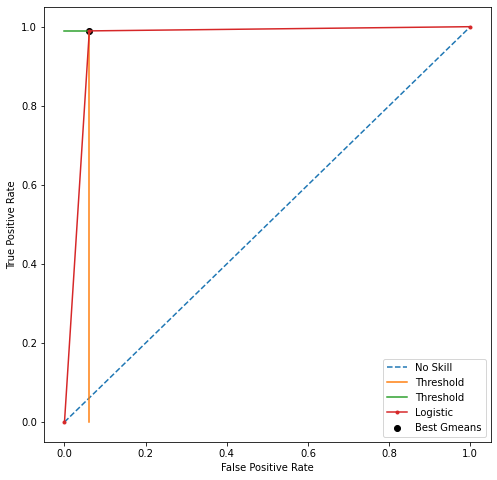

In [52]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np

fpr, tpr, prob_thresholds = roc_curve(y_test, y_pred, drop_intermediate=False)

# Calculate G-mean
arr_gmean = np.sqrt(tpr * (1-fpr))


# locate the index of the largest g-mean
ix = np.argmax(arr_gmean)

print( 'Best Threshold={}, G-mean score={} '.format(round(prob_thresholds[ix],3), round(arr_gmean[ix],3)))
fig, ax = plt.subplots(figsize=(8,8))

plt.plot([0,1], [0,1], linestyle= '--' , label= 'No Skill' )
plt.plot([fpr[ix],fpr[ix]], [0,tpr[ix]], linestyle= '-' , label= 'Threshold' )
plt.plot([0,fpr[ix]], [tpr[ix],tpr[ix]], linestyle= '-' , label= 'Threshold' )

# plot the roc curve for the model
plt.plot(fpr, tpr, marker= '.' , label= 'Logistic' )
plt.scatter(fpr[ix], tpr[ix], marker= 'o' , color= 'black' , label= 'Best Gmeans' )
# axis labels
plt.xlabel( 'False Positive Rate' )
plt.ylabel( 'True Positive Rate' )
plt.legend()
# show the plot
print("(FPR, TPR)=({},{})".format(round(fpr[ix],3),round(tpr[ix],3)))
plt.show()

###  <font color='blues'> Precision / recall curve

Best Threshold=1, F-1 score=0.979 


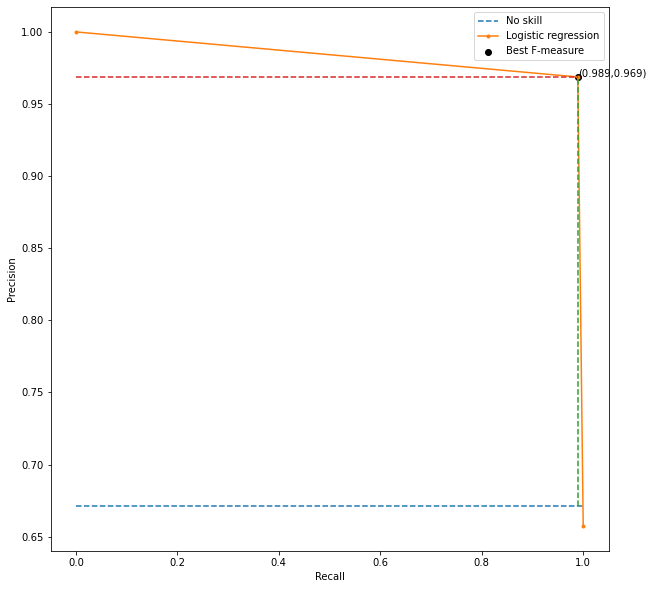

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, prob_thresholds = precision_recall_curve(y_test, y_pred)

# Convert to f1 measure
f1score = (2 * precision * recall) / (precision + recall)

# Locate the index of the largest value in f1-score array
ix = np.argmax(f1score)
print( 'Best Threshold={}, F-1 score={} '.format(round(prob_thresholds[ix],3), round(f1score[ix],3)))
rec  = recall[ix]
pre  = precision[ix]

# Plot the noskill position
no_skill = len(y_pred[y_pred==1]) / len(y_pred)

# Plot the (Recall, Precision) curve
fig, ax = plt.subplots(figsize=(10,10))

plt.plot([0,1], [no_skill,no_skill], linestyle= '--' , label= 'No skill' )
plt.plot(recall, precision, marker= '.' , label= 'Logistic regression'  )

#Plot the best point considering F1 score
plt.scatter(recall[ix], precision[ix], marker= 'o' , color= 'black' , label= 'Best F-measure' )

plt.plot([rec,rec], [no_skill,pre], linestyle= '--' , label= '' )
plt.plot([0,rec], [pre,pre], linestyle= '--' , label= '' )
plt.text(rec, pre, s='('+str(round(rec,3))+','+str(round(pre,3))+')' )
# axis labels
plt.xlabel( 'Recall' )
plt.ylabel( 'Precision' )
plt.legend()
# show the plot
plt.show()

# <font color='blus'>PCA with wine dataset

In [54]:
from sklearn import datasets

bunch_wine = datasets.load_wine()
X = bunch_wine.data
y = bunch_wine.target

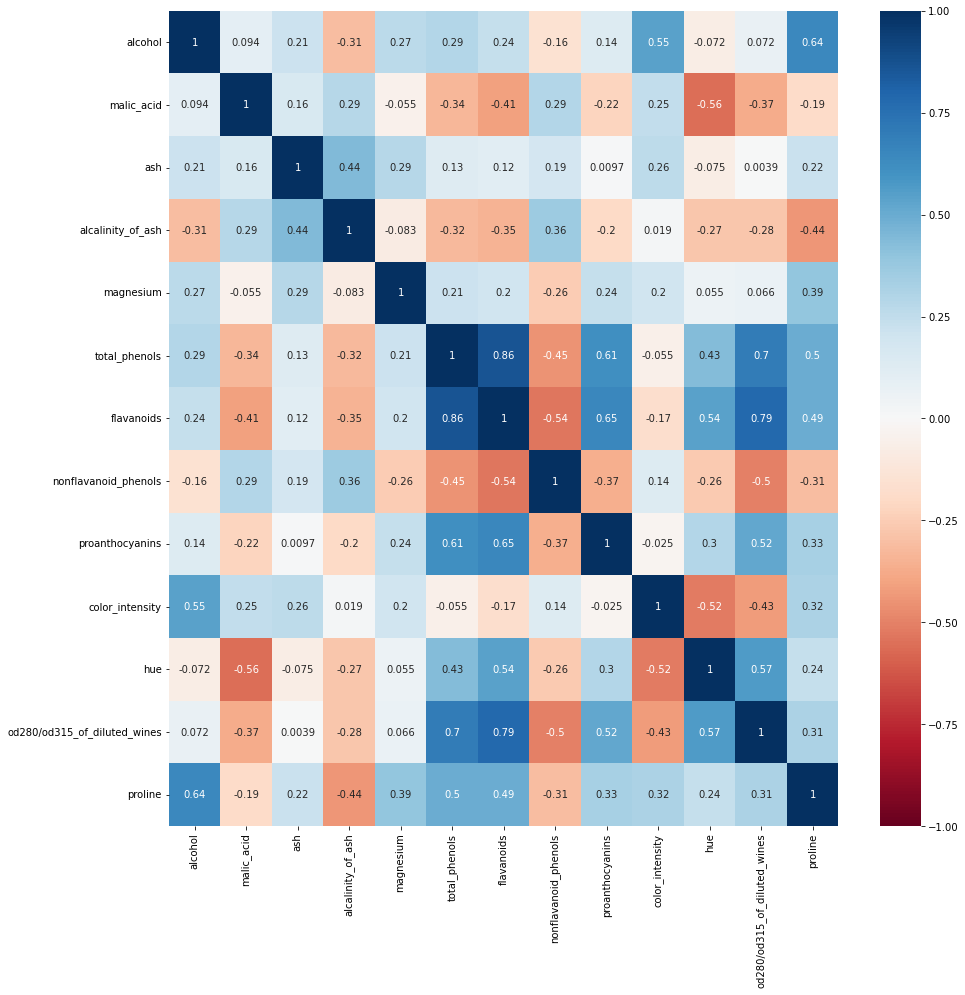

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

df_wine = pd.DataFrame(data=X, columns=bunch_wine.feature_names)
df_corr = df_wine.corr()

plt.figure(figsize=(15,15))
sns.heatmap(df_corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()

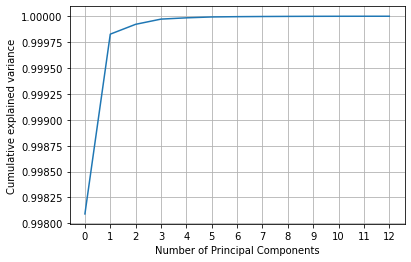

In [56]:
import numpy as np
from sklearn.decomposition import PCA
oPCA = PCA(n_components=df_wine.shape[1])
oPCA.fit(df_wine.values)

plt.plot(np.cumsum(oPCA.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance');
plt.grid(True)
# Remove the last column from dataset, it contains the target
_=plt.xticks([i for i in range(0,df_wine.shape[1])])

(-0.7, 0.7)

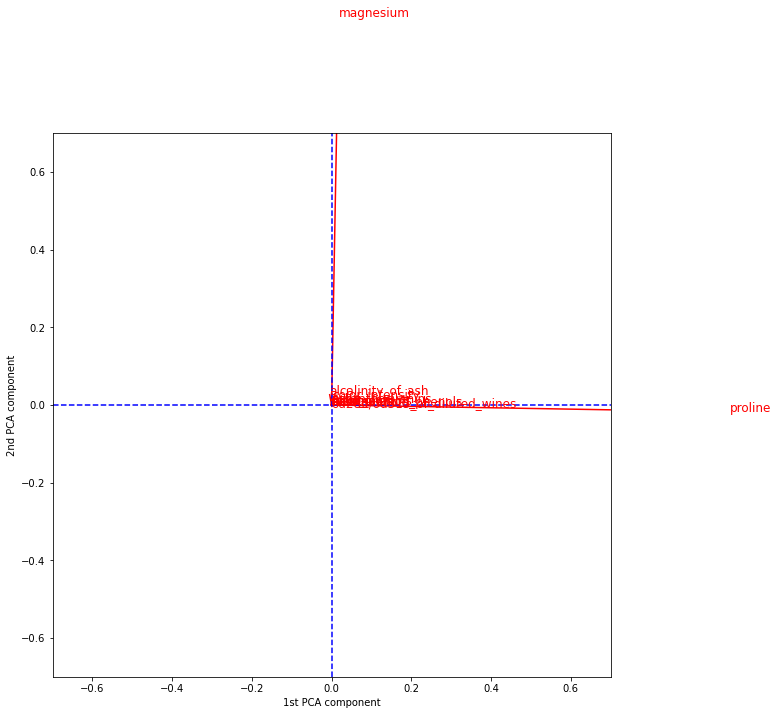

In [57]:
import matplotlib.pyplot as plt
pcs = oPCA.components_

plt.figure(figsize=(10,10))
for i, (pc1, pc2) in enumerate(zip(pcs[0, :], pcs[1, :])):
    target = bunch_wine.target[i]
    if 0 == target:
        # Display segment with origin (0,0)
        plt.plot([0, pc1], [0, pc2], color='r')
        # Display class in the segment extremity
        plt.text(pc1, pc2, bunch_wine.feature_names[i], fontsize='12', color='red')

# Horizontal plot: y=0
plt.plot([-0.7, 0.7], [0, 0], color='blue', ls='--')

# Vertical plot x=0
plt.plot([0, 0], [-0.7, 0.7], color='blue', ls='--')

plt.xlabel('1st PCA component')
plt.ylabel('2nd PCA component')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

## <font color='blus'>Naive Bayse

In [62]:
X_test.shape, y_test.shape, X_train.shape

((45, 13), (45,), (133, 13))

Accuracy = 0.96


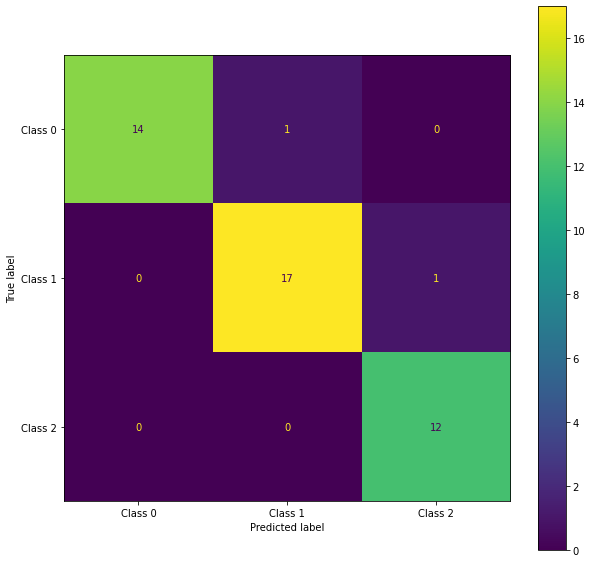

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=13)

nb = GaussianNB()
nb = nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Accuracy = {}".format(round(nb.score(X_test, y_test),2)))

arr_confmatrix = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(arr_confmatrix, display_labels=['Class 0', 'Class 1', 'Class 2'])
fig, ax = plt.subplots(figsize=(10,10))
ax = cmp.plot(ax=ax)

In [64]:
y_pred.shape, y_test.shape

((45,), (45,))

Accuracy = 0.96


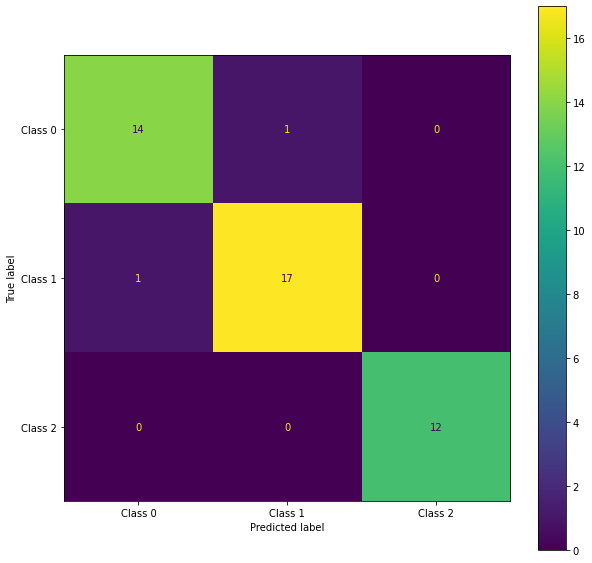

In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

oPCA = PCA(n_components=4)
scaler  = StandardScaler()
scaler = scaler.fit(X_train)
X_train_trans = scaler.transform(X_train)
oPCA = oPCA.fit(X_train_trans)
X_train_pca = oPCA.transform(X_train_trans)
nb = GaussianNB()
nb = nb.fit(X_train_pca, y_train)
X_test_pca = oPCA.transform(scaler.transform(X_test))
print("Accuracy = {}".format( round(nb.score(X_test_pca, y_test),2) ) )


y_pred = nb.predict(X_test_pca)
arr_confmatrix = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(arr_confmatrix, display_labels=['Class 0', 'Class 1', 'Class 2'])
fig, ax = plt.subplots(figsize=(10,10))
ax = cmp.plot(ax=ax)

# <font color='blus'>NMF: Non Negative Matrix Factorization

## <font color='blus'>NMF: presentation

> As for `PCA`, `NMF` consists in defining new features as linear combination of original features.
>
> The difference comes from the fact coefficients are non negatives.
>
> Such method is applied on features where components are non negative.

## <font color='blus'>NMF: implementation

# <font color='blus'>K-means

## <font color='blus'>K-means description

> **K-means** is one of the most used algorithm for clusterization.
>
> It is simple and may lead to excellent results, when data-model is linearly separable.
>> Reminder : linearly separable means that points in data-model can be discriminated with an hyper-plan discriminate.
>
> **K-means** has well-known limitations: 
>> - Because it uses mean, this is a linear algorithm; it is not able to clusterize non-linear data-models, the one that are not separable with an hyper-plan.
>>
>> - K from **K-means** is the number of clusters that have to be pre-defined by the user. This algorithm is not able to find by itself the proper number of clusters in a dataset.
>>
>> - Due to the fact **K-means** uses the mean, then it is sensitive to outliers. Outliers can biaise the location of clusters centers. 
>>
>> - In order to calculate the center of each cluster, **K-means** requires additional points, the **virtuals centers**.
>>
>
> **K-means** works in a iterative manner. 
> 1. The positions of K virtual centers are defined randomly in the dataset. Each virtual center represents the center of a cluster. Virtual,  means here that such points do not belong to the data-model. 
>
> 2. For each point, distance to the virtual centers is calculated and the point is assigned to the cluster that have the minimal distance to the virtual cluster center.
>
> 3. For each cluster, a new virtual center is calculated with the mean position of   points in cluster.
>
> 4. Steps 2. and 3. are replayed until virtuals centers positions stay the same. 

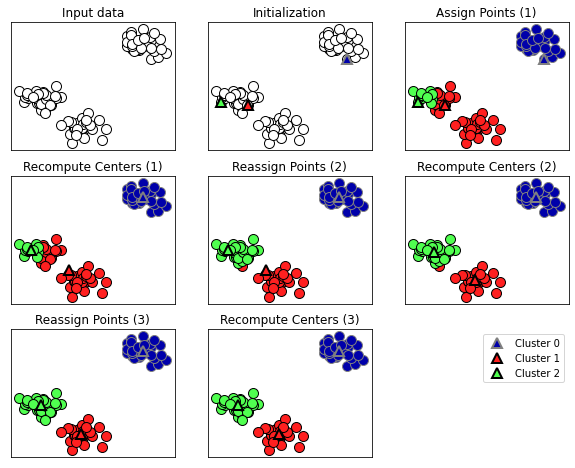

In [66]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

## <font color='blus'>K-means implementation

### <font color='blus'>Dataset generation and display

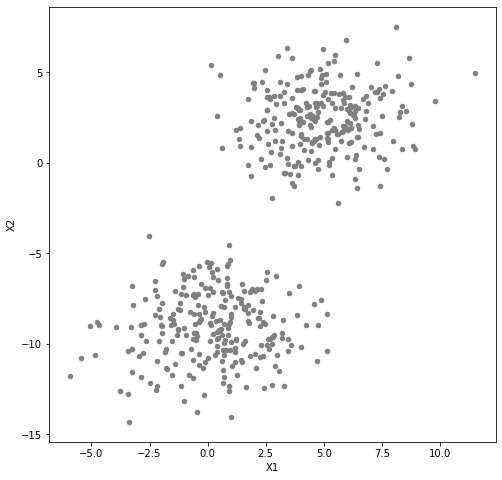

In [71]:
import pandas as pd
from sklearn.datasets import make_blobs

#--------------------------------------------------------
# Create a dataset
#--------------------------------------------------------
data_blob = make_blobs(n_samples=500, cluster_std=2., centers=2)
df_blob = pd.DataFrame(data=data_blob[0], columns=['X1','X2'])
#--------------------------------------------------------
# Define plot area : 1 row, 1 column to plot in 8x8 frame
#--------------------------------------------------------
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
ax=df_blob.plot.scatter(x='X1', y='X2',  ax=axes, c='grey')

> Clusters labels are recorded into `kmean.labels_`

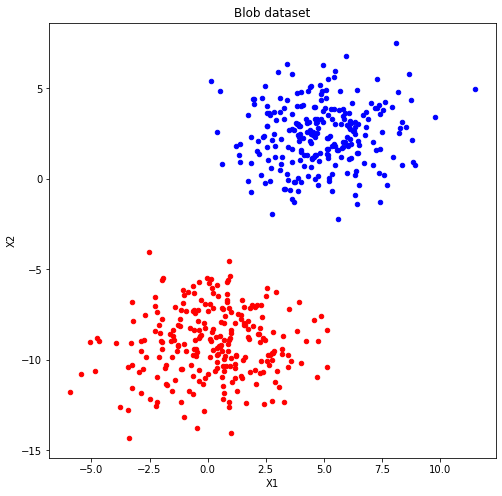

In [72]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans = kmeans.fit(df_blob.values)

#-------------------------------------------------------
# Kemeans performs transformations over data in order 
# to optimize distances calculation.
# These returned data are not used. Only labels 
# issues from clusters are used.
#-------------------------------------------------------
_ = kmeans.transform(df_blob.values)

#--------------------------------------------------------
# Create a pandas dataframe from blobs data; concatenate 
# it with kmeans labels.
# Labels issud from kmeans are recordes into kmeans.labels_
#--------------------------------------------------------
df_blob['label'] = kmeans.labels_

#--------------------------------------------------------
# Define plot area : 1 row, 1 column to plot in 10x10 frame
#--------------------------------------------------------
fig, axes = plt.subplots(1, 1, figsize=(8, 8))

#--------------------------------------------------------
# Plot scatter labels identifying clusters
#--------------------------------------------------------
ax = axes
dict_color = {0:'blue', 1:'red'}
for label in df_blob['label'].unique():
    ax=df_blob[df_blob['label']==label].plot.scatter(x='X1'
                                                     , y='X2'
                                                     , ax=ax
                                                     , c=dict_color[label])
_=ax.set_title('Blob dataset')

## <font color='blus'>K-means limitations for linearity

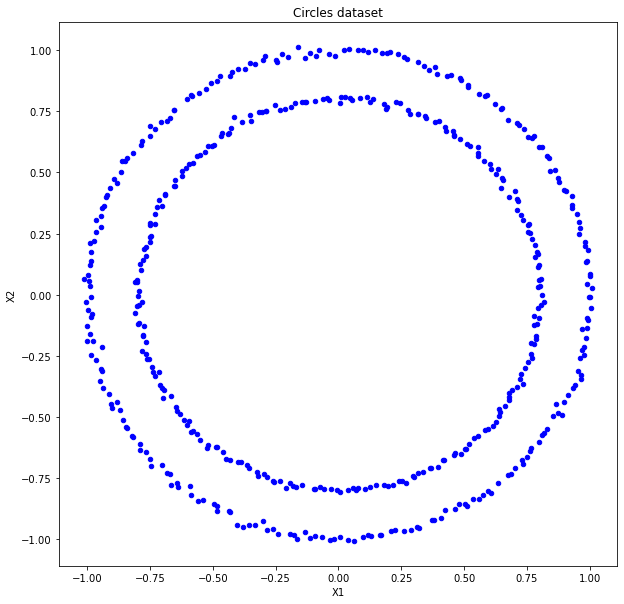

In [73]:
from sklearn.datasets import make_circles
import pandas as pd

#--------------------------------------------------------
# Create a data model
#--------------------------------------------------------
data_circle = make_circles(noise=0.01, n_samples=500)

#--------------------------------------------------------
# Create a pandas dataframe from circles data
#--------------------------------------------------------
df_circle = pd.DataFrame(data=data_circle[0], columns=['X1','X2'])

#--------------------------------------------------------
# Define plot area : 1 row, 1 column to plot 
#--------------------------------------------------------
fig, axes = plt.subplots(1, 1, figsize=(10, 10))


#--------------------------------------------------------
# Plot scatter with no transformation
#--------------------------------------------------------
ax=df_circle.plot.scatter(x=0, y=1,  ax=axes, c='blue')
_ = ax.set_title('Circles dataset')


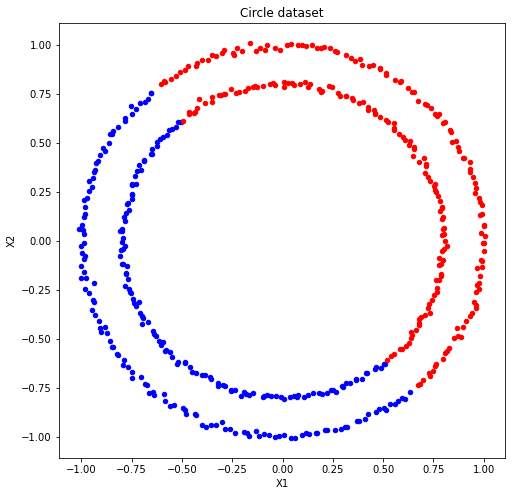

In [74]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans = kmeans.fit(df_circle.values)

#-------------------------------------------------------
# Kemeans performs transformations over data in order 
# to optimize distances calculation.
# These returned data are not used. Only labels 
# issues from clusters are used.
#-------------------------------------------------------
_ = kmeans.transform(df_circle.values)

#--------------------------------------------------------
# Create a pandas dataframe from blobs data; concatenate 
# it with kmeans labels.
# Labels issud from kmeans are recordes into kmeans.labels_
#--------------------------------------------------------
df_circle['label'] = kmeans.labels_

#--------------------------------------------------------
# Define plot area : 1 row, 1 column to plot in 10x10 frame
#--------------------------------------------------------
fig, axes = plt.subplots(1, 1, figsize=(8, 8))

#--------------------------------------------------------
# Plot scatter labels identifying clusters
#--------------------------------------------------------
ax = axes
dict_color = {0:'blue', 1:'red'}
for label in df_blob['label'].unique():
    ax=df_circle[df_circle['label']==label].plot.scatter(x='X1'
                                                     , y='X2'
                                                     , ax=ax
                                                     , c=dict_color[label])
_=ax.set_title('Circle dataset')

> K-means is not able to extract clusters that are interpretable. 

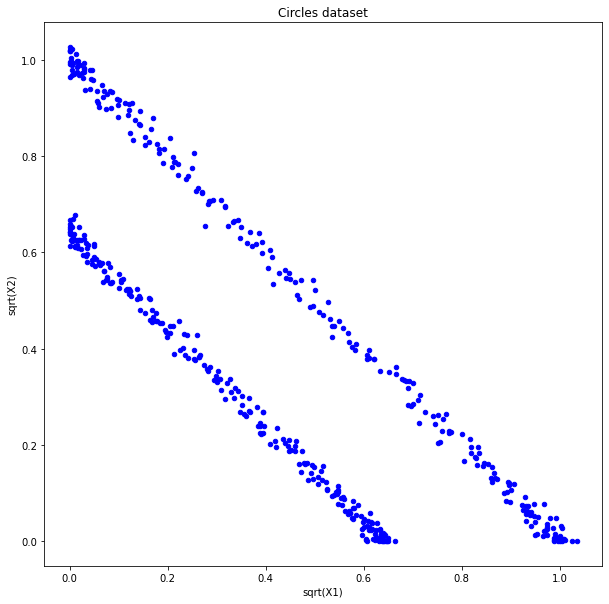

In [75]:
import numpy as np
from sklearn.datasets import make_circles
import pandas as pd

#--------------------------------------------------------
# Create a data model
#--------------------------------------------------------
data_circle = make_circles(noise=0.01, n_samples=500)

#--------------------------------------------------------
# Create a pandas dataframe from circles data
#--------------------------------------------------------
df_circle = pd.DataFrame(data=data_circle[0], columns=['X1','X2'])

# Last column is the target, to be removed for sqrt transformation
for col in df_circle.columns:
    colsqrt="sqrt({})".format(col)
    df_circle[colsqrt] = df_circle[col].apply(lambda val: val*val)

df_circle_sqrt = df_circle.loc[:,['sqrt(X1)','sqrt(X2)']]

#--------------------------------------------------------
# Define plot area : 1 row, 1 column to plot 
#--------------------------------------------------------
fig, axes = plt.subplots(1, 1, figsize=(10, 10))


#--------------------------------------------------------
# Plot scatter with no transformation
#--------------------------------------------------------
ax=df_circle_sqrt.plot.scatter(x=0, y=1,  ax=axes, c='blue')
_ = ax.set_title('Circles dataset')


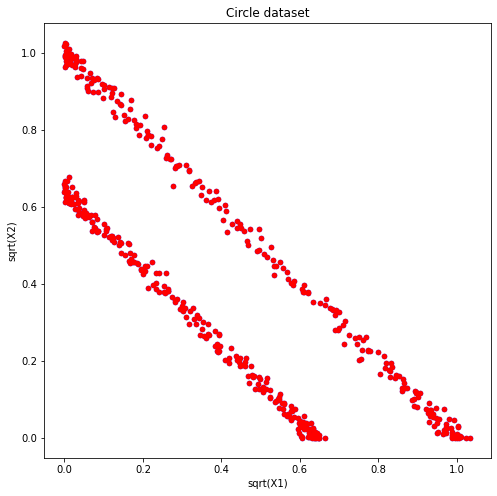

In [77]:
import pandas as pd
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
kmeans = kmeans.fit(df_circle_sqrt.values)

#-------------------------------------------------------
# K-means performs transformations over data in order 
# to optimize distances calculation.
# These returned data are not used. Only labels 
# issues from clusters are used.
#-------------------------------------------------------
_ = kmeans.transform(df_circle_sqrt.values)

#--------------------------------------------------------
# Create a pandas dataframe from blobs data; concatenate 
# it with kmeans labels.
# Labels issud from kmeans are recordes into kmeans.labels_
#--------------------------------------------------------
df_circle_sqrt['label'] = kmeans.labels_

#--------------------------------------------------------
# Define plot area : 1 row, 1 column to plot in 10x10 frame
#--------------------------------------------------------
fig, axes = plt.subplots(1, 1, figsize=(8, 8))

#--------------------------------------------------------
# Plot scatter labels identifying clusters
#--------------------------------------------------------
ax = axes
dict_color = {0:'blue', 1:'red'}
for label in df_circle_sqrt['label'].unique():
    ax=df_circle_sqrt.plot.scatter(x='sqrt(X1)'
                                 , y='sqrt(X2)'
                                 , ax=ax
                                 , c=dict_color[label])
_=ax.set_title('Circle dataset')

### <font color='blus'>K-means conclusions

> **Linear dataset structures**
> - Even along with a dataset with a linear structure, K-means may not be able to extract 
> interpretable clusters.
>
> **Clusters structure for K-means**
> - K-means work well when, in addtion to be linearly separable, dataset has to be  structured as densed / closed form groups.
>
> **Distances calculation**
> - K-means makes use of distances calculation in order to assign a point to a cluster. This fact leads to make use of scaler in order to unbiase 
>
> **Outlier sensibility**
> - K-means make use of mean, that render biaised clusters when outliers are in dataset. The `RobustScaler` data scaler should then be used in order to scale the da

# <font color='blus'>DBSCAN

## <font color='blus'>DBSCAN presentation

> DBSCAN stands for Density Based Spacial Clustering of Application with Noise
>
> Ideas :
> - Dense regions separated by regions that are empty.
>    - Density for a region is modeled by a number of points inside an hyper-sphere with ray $\epsilon$ 
> - Core points: points inside dense regions
> - Boundary points: in cluster that are not Core points
> - Noise : points that do not belog to any cluster

## <font color='blus'>DBSCAN implementation

### <font color='blus'>Clusterization of original dataset from make_circles

In [78]:
import numpy as np
from sklearn.datasets import make_circles
import pandas as pd

#--------------------------------------------------------
# Create a data model
#--------------------------------------------------------
data_circle = make_circles(noise=0.01, n_samples=500)

#--------------------------------------------------------
# Create a pandas dataframe from circles data
#--------------------------------------------------------
df_circle = pd.DataFrame(data=data_circle[0], columns=['X1','X2'])

> Apply DBSCAN clusterization.

In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
scaler.fit(df_circle.values)
X_trans = scaler.transform(df_circle.values)

dbscan = DBSCAN(eps=0.5, min_samples=3)
clusters = dbscan.fit_predict(X_trans)
print("Number of clusters= {}".format(len(np.unique(clusters))))


#--------------------------------------------------------
# Create a pandas dataframe from blobs data; concatenate 
# it with kmeans labels.
# Labels issud from kmeans are recordes into kmeans.labels_
#--------------------------------------------------------
df_circle['label'] = dbscan.labels_

print("Array of DBSCAN labels= {}".format(np.unique(dbscan.labels_)))

Number of clusters= 2
Array of DBSCAN labels= [0 1]


> Plot clusterized dataset

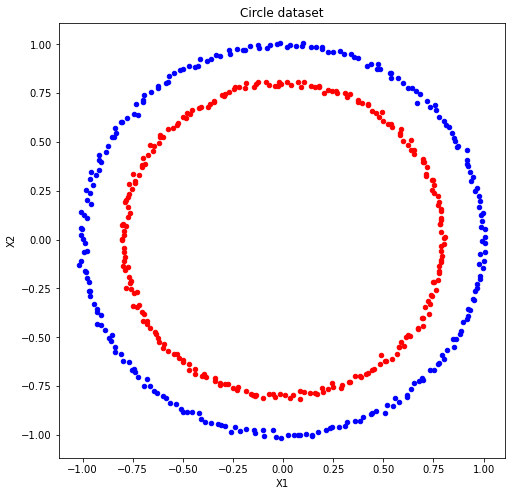

In [96]:
#--------------------------------------------------------
# Define plot area : 1 row, 1 column to plot in 10x10 frame
#--------------------------------------------------------
fig, axes = plt.subplots(1, 1, figsize=(8, 8))

#--------------------------------------------------------
# Plot scatter labels identifying clusters
#--------------------------------------------------------
ax = axes
dict_color = {0:'blue', 1:'red', -1:'grey'}
for label in df_circle['label'].unique():
    ax=df_circle[df_circle['label']==label].plot.scatter(x='X1'
                                                     , y='X2'
                                                     , ax=ax
                                                     , c=dict_color[label])
_=ax.set_title('Circle dataset')

### <font color='blus'>Derive linear dataset from make_circles

> Also use power 2 transformation to check DBSCAN behavior

In [97]:
import numpy as np
from sklearn.datasets import make_circles
import pandas as pd

#--------------------------------------------------------
# Create a data model
#--------------------------------------------------------
data_circle = make_circles(noise=0.01, n_samples=500)

#--------------------------------------------------------
# Create a pandas dataframe from circles data
#--------------------------------------------------------
df_circle = pd.DataFrame(data=data_circle[0], columns=['X1','X2'])

# Last column is the target, to be removed for sqrt transformation
for col in df_circle.columns:
    colsqrt="sqrt({})".format(col)
    df_circle[colsqrt] = df_circle[col].apply(lambda val: val*val)

df_circle_sqrt = df_circle.loc[:,['sqrt(X1)','sqrt(X2)']]

> Apply DBSCAN clusterization.

In [98]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
scaler.fit(df_circle_sqrt.values)
X_trans = scaler.transform(df_circle_sqrt.values)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_trans)
print("Number of clusters= {}".format(len(np.unique(clusters))))


#--------------------------------------------------------
# Create a pandas dataframe from blobs data; concatenate 
# it with kmeans labels.
# Labels issud from kmeans are recordes into kmeans.labels_
#--------------------------------------------------------
df_circle_sqrt['label'] = dbscan.labels_

print("Array of DBSCAN labels= {}".format(np.unique(dbscan.labels_)))

Number of clusters= 2
Array of DBSCAN labels= [0 1]


> Plot clusterized dataset

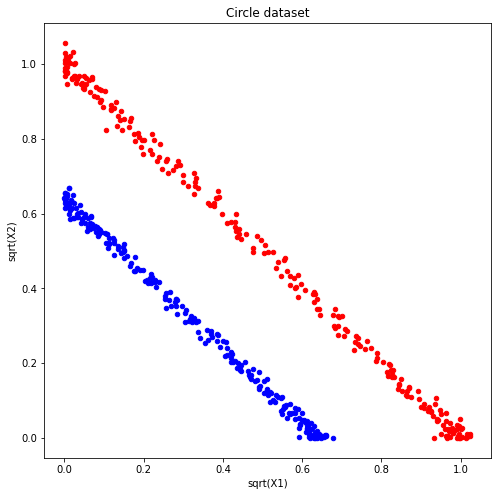

In [99]:
#--------------------------------------------------------
# Define plot area : 1 row, 1 column to plot in 10x10 frame
#--------------------------------------------------------
fig, axes = plt.subplots(1, 1, figsize=(8, 8))

#--------------------------------------------------------
# Plot scatter labels identifying clusters
#--------------------------------------------------------
ax = axes
dict_color = {0:'blue', 1:'red', -1:'grey'}
for label in df_circle_sqrt['label'].unique():
    ax=df_circle_sqrt[df_circle_sqrt['label']==label].plot.scatter(x='sqrt(X1)'
                                                     , y='sqrt(X2)'
                                                     , ax=ax
                                                     , c=dict_color[label])
_=ax.set_title('Circle dataset')

### <font color='blus'>DBSCAN conclusions

> **Clusters structures for DBSCAN**
> - DBSCAN properly works when a continuous path may be found within clusters structures. These paths are based on density concept, expressed by the number of data points inside a hyper-sphere (circle in 2 dimensions, sphere in 3 dimensions, hyper-sphere in dimensions beyond).
>
> **Differences in densities**
> - DBSCAN hyper-parameters (`min_samples`, `$\epsilon$`), are tuned for a specific cluster density. When densities change from one cluster to another then DBSCAN efficiency dramaticaly drop. 
>
> **Hyper-parameters**
> - DBSCAN makes use of distances calculation in order to define local densities. Due to that, scaling dataset is recommanded before applying DBSCAN. One of the tricky thing with DBSCAN is parameters tuning. 
>
> **Outlier sensibility**
> - DBSCAN support outliers, that are classified as points without any clusters; such points are qualified as noise and their label is fixed to -1.

# <font color='blus'>Agglomerative clustering

## <font color='blus'>Variance inside a cluster

> While PCA rotates dataset in order to have the greatest variances along with each axes,  clusterization looks for having the smallest variance inside a cluster. In a such situation, the variance is an expression of compactness.

## <font color='blus'>Agglomerative clusterization presentation

> Agglomerative clustering works on merging pairs of clusters.
>
> It starts from the point where each data-point is its own cluster.
>
> Therefore, these early clusters are **agglomerated by pairs**, based on a criteria, such as minimum variance resulting from an agglomeration. 

## <font color='blus'>Agglomerative clusterization implementation

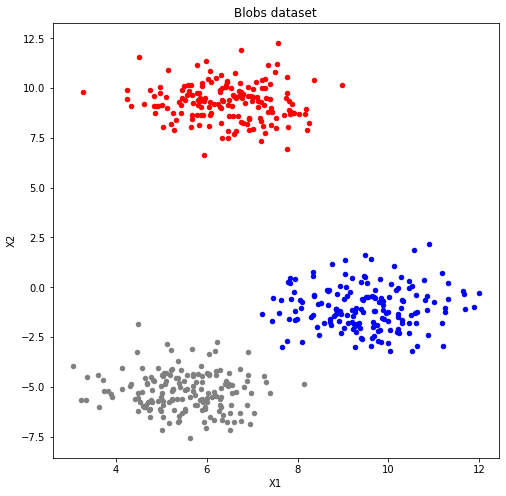

In [102]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering



#--------------------------------------------------------
# Pandas dataframe from make_blobs
#--------------------------------------------------------
X, y = make_blobs(random_state=13, n_samples=500)
df_blob = pd.DataFrame(data=X, columns=['X1','X2'])

#--------------------------------------------------------
# Agglomerative clusterization
#--------------------------------------------------------
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(df_blob[['X1','X2']])

#--------------------------------------------------------
# Complete the dataset with labels assignement
#--------------------------------------------------------
df_blob['label'] = agg.labels_

#--------------------------------------------------------
# Define plot area : 1 row, 1 column to plot in 10x10 frame
#--------------------------------------------------------
fig, axes = plt.subplots(1, 1, figsize=(8, 8))

#--------------------------------------------------------
# Plot scatter labels identifying clusters
#--------------------------------------------------------
ax = axes
dict_color = {0:'blue', 1:'red', 2:'grey'}
for label in df_blob['label'].unique():
    ax=df_blob[df_blob['label']==label].plot.scatter(x='X1'
                                                     , y='X2'
                                                     , ax=ax
                                                     , c=dict_color[label])
_=ax.set_title('Blobs dataset')

In [103]:
#dir(agg)

## <font color='blus'>The dendogram representation

Text(0, 0.5, 'Cluster distance')

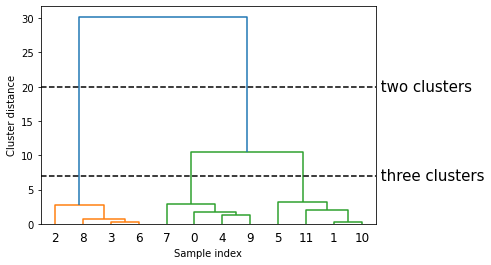

In [104]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering



#--------------------------------------------------------
# Pandas dataframe from make_blobs
#--------------------------------------------------------
X, y = make_blobs(random_state=13, n_samples=12)
df_blob = pd.DataFrame(data=X, columns=['X1','X2'])

# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)

# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [7, 7], '--', c='k')
ax.plot(bounds, [20, 20], '--', c='k')
ax.text(bounds[1], 20, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 7, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

# <font color='blus'>t-SNE

## <font color='blus'>t-SNE presentation

> **t-SNE** uses student distributions (t is for student).
>
> **t-SNE** is used to reduce dimension of a dataset with **intention of display**.
>
> It is rarely used for prediction, mean, training the algorithm on a train dataset, this, thanks to the `fit` method from sklearn algorithms, hence validate the algorithm with `transform` method.
>
> This algorithm does in a such way that fareness between two points in the large space is preserved, **in probabilities**, in the reduced space.

## <font color='blus'>Applying PCA on digits dataset to compare with PCA

> In order to compare efficiency of t-SNE, reduction dimension is performed first with PCA algorithm.
>
> Following picture is the display of a sample of digits issued from the dataset.
>
> It can be shown that some digits, such as 3 and 8, are difficult to discriminate with a such resolution.

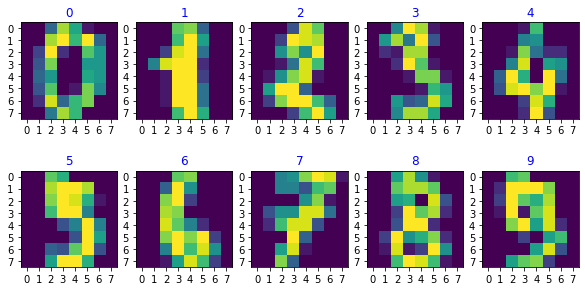

In [87]:
from sklearn.datasets import load_digits
# Dataset of digits is loaded as a bunch dataframe
bunch_digits = load_digits()

# Select 2 rows and 5 columns to display digits into elements of axes
# -> xticks, yticks match with pixels : 8x8 resolution
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
subplot_kw={'xticks':[i for i in range(8)], 'yticks': [i for i in range(8)]})

# Each digit is displayed inside a ax
for ax, img, digit_name in zip(axes.ravel(), bunch_digits.images, bunch_digits.target):
    ax.imshow(img)
    ax.set_title(str(digit_name), c='blue')

> In order to compare t-SNE with PCA, let's apply PCA on dataset

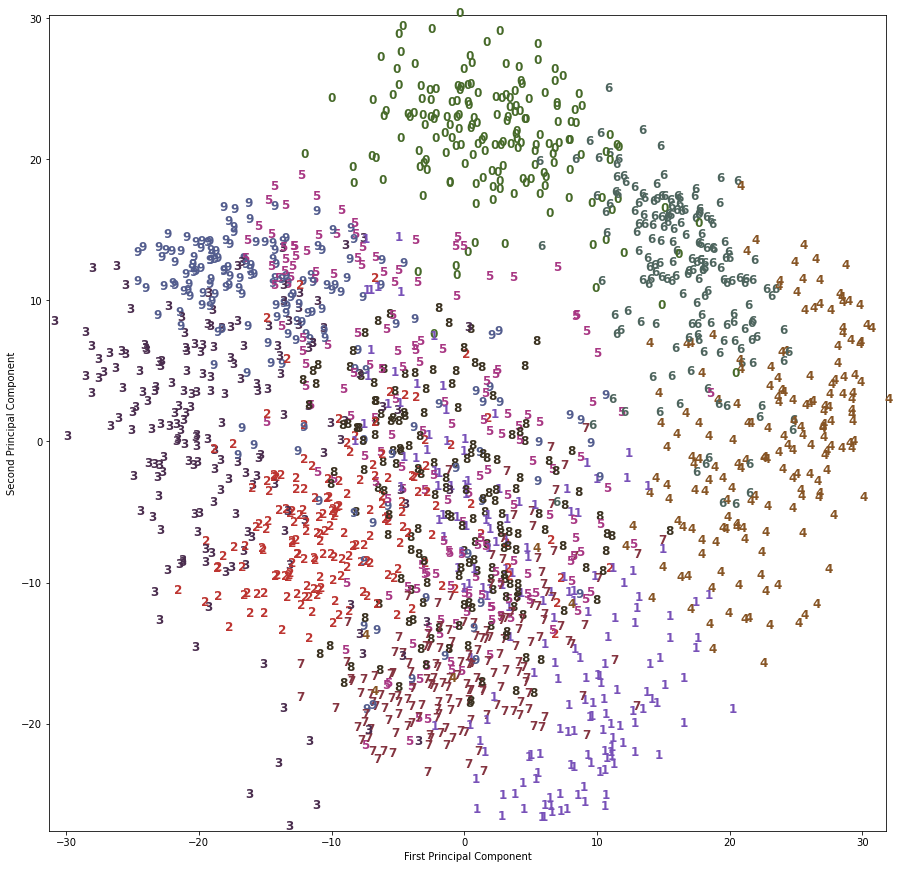

In [88]:
from sklearn.decomposition import PCA

oPCA = PCA(n_components=2)
bunch_digits_pca = oPCA.fit_transform(bunch_digits.data)

#---------------------------------------------------------------------
# Get a list of 10 colors, one for each digit
#---------------------------------------------------------------------
list_color_digit = [  "#476A2A"# Color for digit 0
                    , "#7851B8"# Color for digit 1
                    , "#BD3430"# Color for digit 2
                    , "#4A2D4E"# Color for digit 3
                    , "#875525"# Color for digit 4
                    , "#A83683"# Color for digit 5
                    , "#4E655E"# Color for digit 6
                    , "#853541"# Color for digit 7
                    , "#3A3120"# Color for digit 8
                    , "#535D8E"# Color for digit 9
                   ]
# Fixe frame for display with min and max axes
plt.figure(figsize=(15, 15))
plt.xlim(bunch_digits_pca[:, 0].min()-0.1, bunch_digits_pca[:, 0].max()+0.1)
plt.ylim(bunch_digits_pca[:, 1].min()-0.1, bunch_digits_pca[:, 1].max()+0.1)

#---------------------------------------------------------------------
# Indexes issued from transformed dataset and original one are the same.
# Then original digits names can be assigned to the t-SNE transformed 
# digits dataset.
#---------------------------------------------------------------------
for ind in range(len(bunch_digits_pca.data)):
    
    #-----------------------------------------------------------------
    # Display digit name at the position in the factorial dataset
    #
    # bunch_digits_pca[ind, 0] : horizontal component of transformed dataset 
    #                             for digit with index ind
    # bunch_digits_pca[ind, 1] : vertical component of transformed dataset 
    #                             for digit with index ind
    # bunch_digits.target[ind]: the digit value with index ind; this is an integer
    #
    # str(bunch_digits.target[ind]) : the digit with index ind casted into a string
    #                                 for display 
    # list_color_digit[bunch_digits.target[ind]] : color assigned to the 
    # digit value
    #-----------------------------------------------------------------
    plt.text(  bunch_digits_pca[ind, 0]# first Principal Componant
             , bunch_digits_pca[ind, 1]# Second Principal Componant
             , bunch_digits.target[ind]# Name of the data point
             , color = list_color_digit[bunch_digits.target[ind]]
             , fontdict={'weight': 'bold', 'size': 12})
    plt.xlabel("First Principal Component")
    plt.ylabel("Second Principal Component")

> Discrimination based on variance do not produce good results on this dataset.
>
> Variance depends on the shape of digits and these lasts do not allow to discriminate digits properly.

### <font color='blus'>Applying t-SNE on digits dataset

In [89]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=13, perplexity=10)
bunch_digits_tsne = tsne.fit_transform(bunch_digits.data)

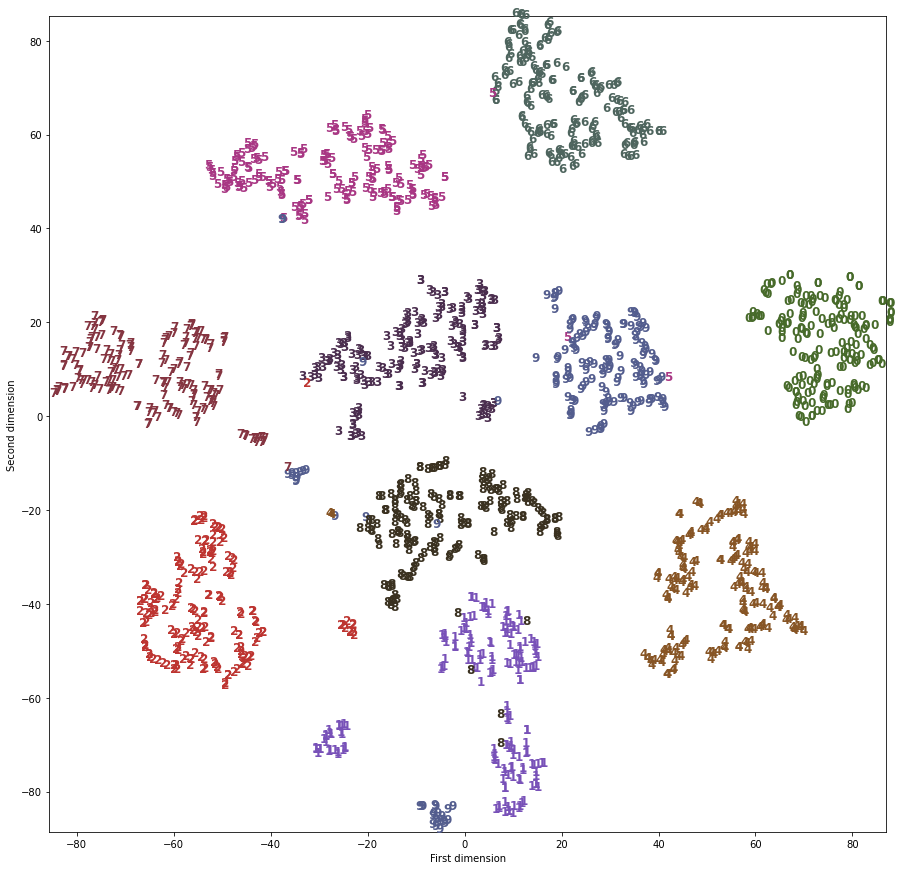

In [90]:
#---------------------------------------------------------------------
# Get a list of 10 colors, one for each digit
#---------------------------------------------------------------------
list_color_digit = [  "#476A2A"# Color for digit 0
                    , "#7851B8"# Color for digit 1
                    , "#BD3430"# Color for digit 2
                    , "#4A2D4E"# Color for digit 3
                    , "#875525"# Color for digit 4
                    , "#A83683"# Color for digit 5
                    , "#4E655E"# Color for digit 6
                    , "#853541"# Color for digit 7
                    , "#3A3120"# Color for digit 8
                    , "#535D8E"# Color for digit 9
                   ]
# Fixe frame for display with min and max axes
plt.figure(figsize=(15, 15))
plt.xlim(bunch_digits_tsne[:, 0].min(), bunch_digits_tsne[:, 0].max())
plt.ylim(bunch_digits_tsne[:, 1].min(), bunch_digits_tsne[:, 1].max())

#---------------------------------------------------------------------
# Indexes issued from transformed dataset and original one are the same.
# Then original digits names can be assigned to the t-SNE transformed 
# digits dataset.
#---------------------------------------------------------------------
for ind in range(len(bunch_digits_tsne.data)):
    
    #-----------------------------------------------------------------
    # Display digit name at the position in the rotated dataset
    #
    # bunch_digits_tsne[ind, 0] : horizontal component of transformed dataset 
    #                             for digit with index ind
    # bunch_digits_tsne[ind, 1] : vertical component of transformed dataset 
    #                             for digit with index ind
    # bunch_digits.target[ind]: the digit value with index ind; this is an integer
    #
    # str(bunch_digits.target[ind]) : the digit with index ind casted into a string
    #                                 for display 
    # list_color_digit[bunch_digits.target[ind]] : color assigned to the 
    # digit value
    #-----------------------------------------------------------------
    plt.text(  bunch_digits_tsne[ind, 0]
             , bunch_digits_tsne[ind, 1]
             , bunch_digits.target[ind]
             , color = list_color_digit[bunch_digits.target[ind]]
             , fontdict={'weight': 'bold', 'size': 12})
    plt.xlabel("First dimension")
    plt.ylabel("Second dimension")

> Digits issued from t-SNE transformed dataset are organized as compact groups.
>
> Some digits are packed into separated groups.
>
> All the packed groups are relatively homogeneous.

# <font color='blus'>Application - COVID 19

In [ ]:
import pandas as pd
df_covid = pd.read_csv("./Data/CovidLive.csv")

In [ ]:
df_covid.head(10)

In [81]:
del(df_covid['#'])

## <font color='blus'>Rename columns

In [82]:
dict_colname = {col:col.replace('\n','_').replace(',','').replace('/','').replace(' ','') for col in df_covid.columns}
dict_colname
df_covid.rename(columns=dict_colname, inplace=True)

In [83]:
print(df_covid.columns)

Index(['Country_Other', 'Total_Cases', 'Total_Deaths', 'New_Deaths',
       'Total_Recovered', 'Active_Cases', 'Serious_Critical', 'TotCases_1Mpop',
       'Deaths_1Mpop', 'Total_Tests', 'Tests_1Mpop', 'Population'],
      dtype='object')


## <font color='blus'>Clean dataset

In [84]:
for col in df_covid.columns:
    print(col, df_covid[col].isna().value_counts())
    print()

Country_Other False    230
Name: Country_Other, dtype: int64

Total_Cases False    230
Name: Total_Cases, dtype: int64

Total_Deaths False    225
True       5
Name: Total_Deaths, dtype: int64

New_Deaths True     227
False      3
Name: New_Deaths, dtype: int64

Total_Recovered False    214
True      16
Name: Total_Recovered, dtype: int64

Active_Cases False    215
True      15
Name: Active_Cases, dtype: int64

Serious_Critical False    147
True      83
Name: Serious_Critical, dtype: int64

TotCases_1Mpop False    228
True       2
Name: TotCases_1Mpop, dtype: int64

Deaths_1Mpop False    223
True       7
Name: Deaths_1Mpop, dtype: int64

Total_Tests False    214
True      16
Name: Total_Tests, dtype: int64

Tests_1Mpop False    214
True      16
Name: Tests_1Mpop, dtype: int64

Population False    228
True       2
Name: Population, dtype: int64



In [85]:
list_col = ['Serious_Critical', 'New_Deaths']
for col in list_col:
    del(df_covid[col])

### <font color='blus'>Drop rows with NaN values

In [86]:
list_index = list()
for col in df_covid.columns:
    list_index += list(df_covid[df_covid[col].isna()==True].index)
set_index = set(list_index)

print(df_covid.shape)

df_covid.drop(index=set_index, inplace=True)

(230, 10)


> Reset index

In [87]:
df_covid.reset_index(inplace=True)
del(df_covid['index'])

> Isolate `Country_Other` feature

In [88]:
ser_country = df_covid['Country_Other']
del(df_covid['Country_Other'])

### <font color='blus'>Format decimals

In [89]:
df_covid.head()

,Total_Cases,Total_Deaths,Total_Recovered,Active_Cases,TotCases_1Mpop,Deaths_1Mpop,Total_Tests,Tests_1Mpop,Population
0,"98,166,904","1,084,282","94,962,112","2,120,510","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,"44,587,307","528,629","44,019,095","39,583","31,698",376,"894,416,853","635,857","1,406,631,776"
2,"35,342,950","155,078","34,527,115","660,757","538,892","2,365","271,490,188","4,139,547","65,584,518"
3,"34,706,757","686,027","33,838,636","182,094","161,162","3,186","63,776,166","296,146","215,353,593"
4,"33,312,373","149,948","32,315,200","847,225","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [90]:
for col in df_covid.columns:
    df_covid[col] = df_covid[col].apply(lambda val: float(val.replace(',','')))

## <font color='blus'> PCA analysis

### <font color='blus'> Correlation matrix

In [91]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(df_covid.values)

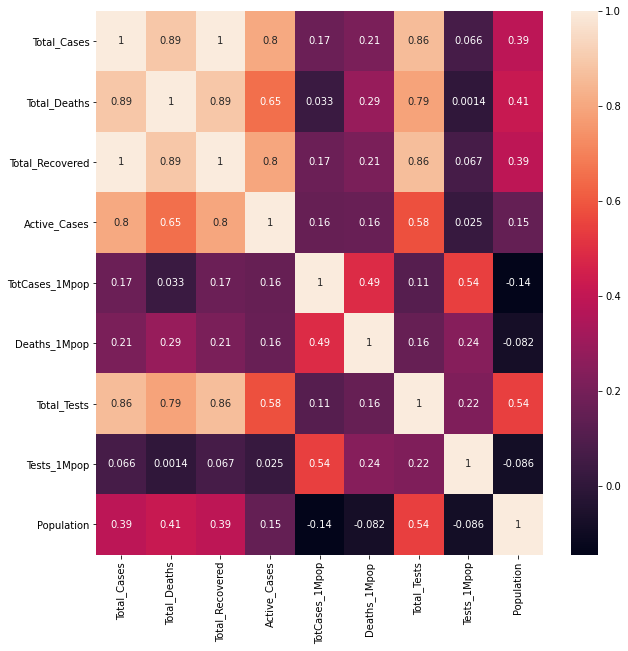

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_covid.corr(), annot=True, ax=axes)

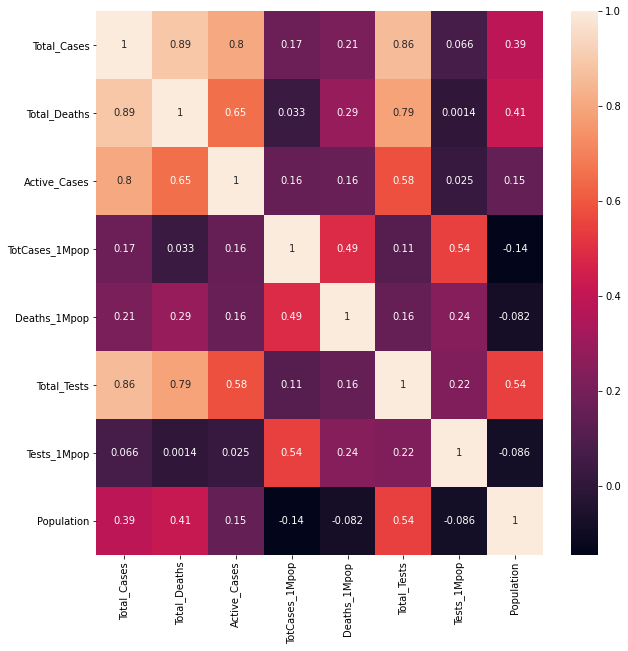

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

df_covid_uncorr = remove_correlation(df_covid, THRESHOLD=0.9)
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df_covid_uncorr.corr(), annot=True, ax=axes)

### <font color='blus'> Plot explained variance

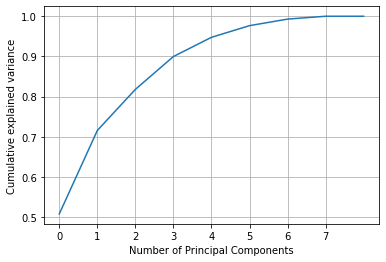

In [94]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xscale = scaler.fit_transform(df_covid_uncorr.values)
oPCA = PCA(n_components=df_covid.shape[1])
X_pca = oPCA.fit_transform(X_scale)

# Rotate dataset along higher variance axes
plt.plot(np.cumsum(oPCA.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative explained variance');
plt.grid(True)
# Remove the last column from dataset, it contains the target
_=plt.xticks([i for i in range(0,df_covid_uncorr.shape[1])])

### <font color='blus'> Plot scatter points with t-SNE

> Due to the fact 70% of variance is explained with 2 components, this ration is not 
>
> enough to have a proprer 2D representation of dataset. 
>
> t-SNE seems to be more appropriate

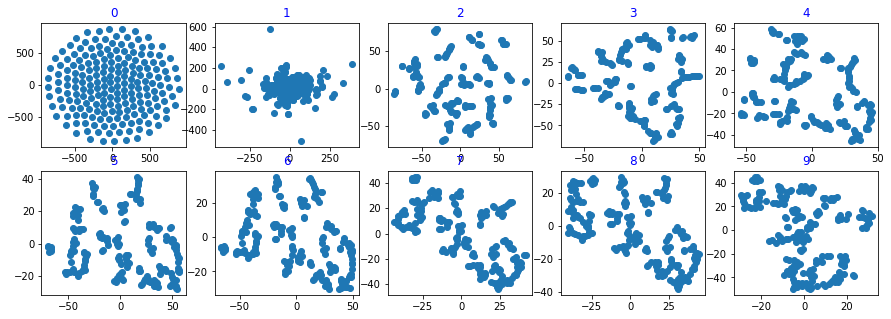

In [95]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

scaler = StandardScaler()
X_scale = scaler.fit_transform(df_covid.values)
#fig, axes = plt.subplots(1, 1, figsize=(10, 10))

fig, axes = plt.subplots(2, 5, figsize=(15, 5))
perplexity = 10
for ax, perplexity in zip(axes.ravel(), range(2*5)) :
    tsne = TSNE(random_state=13, perplexity=perplexity)
    arr_tsne = tsne.fit_transform(X_scale)    
    ax.scatter(  arr_tsne[:,0]
                , arr_tsne[:,1]
                )
    ax.set_title(str(perplexity), c='blue')
    perplexity += 10

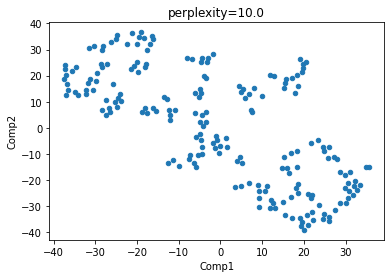

In [96]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(df_covid.values)
#fig, axes = plt.subplots(1, 1, figsize=(10, 10))

perplexity = 10.
tsne = TSNE(random_state=13, perplexity=perplexity)
arr_tsne = tsne.fit_transform(X_scale)
df_tsne = pd.DataFrame(data=arr_tsne, columns=['Comp1', 'Comp2'])
ax = df_tsne.plot.scatter(  x='Comp1'
                          , y='Comp2'
                          , title='perplexity={}'.format(perplexity)
                          )

## <font color='blus'> DBSCAN

#### <font color='blus'> DBSCAN application

In [97]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=6., min_samples=5)
clusters = dbscan.fit_predict(arr_tsne)
print("Number of clusters= {}".format(len(np.unique(clusters))))


#--------------------------------------------------------
# Create a pandas dataframe from blobs data; concatenate 
# it with kmeans labels.
# Labels issud from kmeans are recordes into kmeans.labels_
#--------------------------------------------------------

print("Array of DBSCAN labels= {}".format(np.unique(dbscan.labels_)))
print()

Number of clusters= 5
Array of DBSCAN labels= [0 1 2 3 4]



#### <font color='blus'> Clusters analysis

> The list of elements in each cluster is displayed.

In [98]:
#----------------------------------------------------------------
# Create pandas dataframe issued from TSNE dimension reduction
# Add column of clusters labels.
#----------------------------------------------------------------
df_dbscan = pd.DataFrame(data=arr_tsne, columns=['Comp1', 'Comp2'])
df_dbscan['label'] = dbscan.labels_

#----------------------------------------------------------------
# Loop over clusters labels
#----------------------------------------------------------------
for label in df_dbscan['label'].value_counts().index:
    print("Label= {}".format(label))
    
    #------------------------------------------------------------
    # List of clusters elements is filtered by cluster label
    #------------------------------------------------------------
    list_index = df_dbscan[df_dbscan['label']==label].index

    #------------------------------------------------------------
    # Print the country list related to cluster elements 
    #------------------------------------------------------------
    for country in ser_country.loc[list_index]:
        print(country, end=', ')
    print('\n')

Label= 3
Indonesia, Thailand, Philippines, Iraq, Bangladesh, Pakistan, Morocco, Nepal, Saudi Arabia, Dominican Republic, Myanmar, Venezuela, Egypt, Ethiopia, Kenya, Zambia, Algeria, Nigeria, Zimbabwe, China, Uzbekistan, Mozambique, Kyrgyzstan, Afghanistan, Uganda, Ghana, Cambodia, Rwanda, Cameroon, Angola, DRC, Senegal, Malawi, Ivory Coast, Madagascar, Sudan, Mauritania, Syria, Burundi, Gabon, Papua New Guinea, Togo, Guinea, Lesotho, Haiti, Mali, Benin, Somalia, Congo, Timor-Leste, Burkina Faso, Solomon Islands, South Sudan, Equatorial Guinea, Samoa, Djibouti, CAR, Gambia, Yemen, Vanuatu, Eritrea, Niger, Micronesia, Guinea-Bissau, Liberia, Chad, Sao Tome and Principe, Macao, 

Label= 2
Australia, Netherlands, Portugal, Austria, Greece, Israel, Belgium, Czechia, Switzerland, Denmark, Singapore, Georgia, New Zealand, Hong Kong, Ireland, Norway, Finland, Lithuania, Slovenia, UAE, Mongolia, Latvia, Bahrain, Estonia, Cyprus, Réunion, Luxembourg, Montenegro, Brunei, Maldives, Malta, Barbados

#### <font color='blus'> Plot clusters

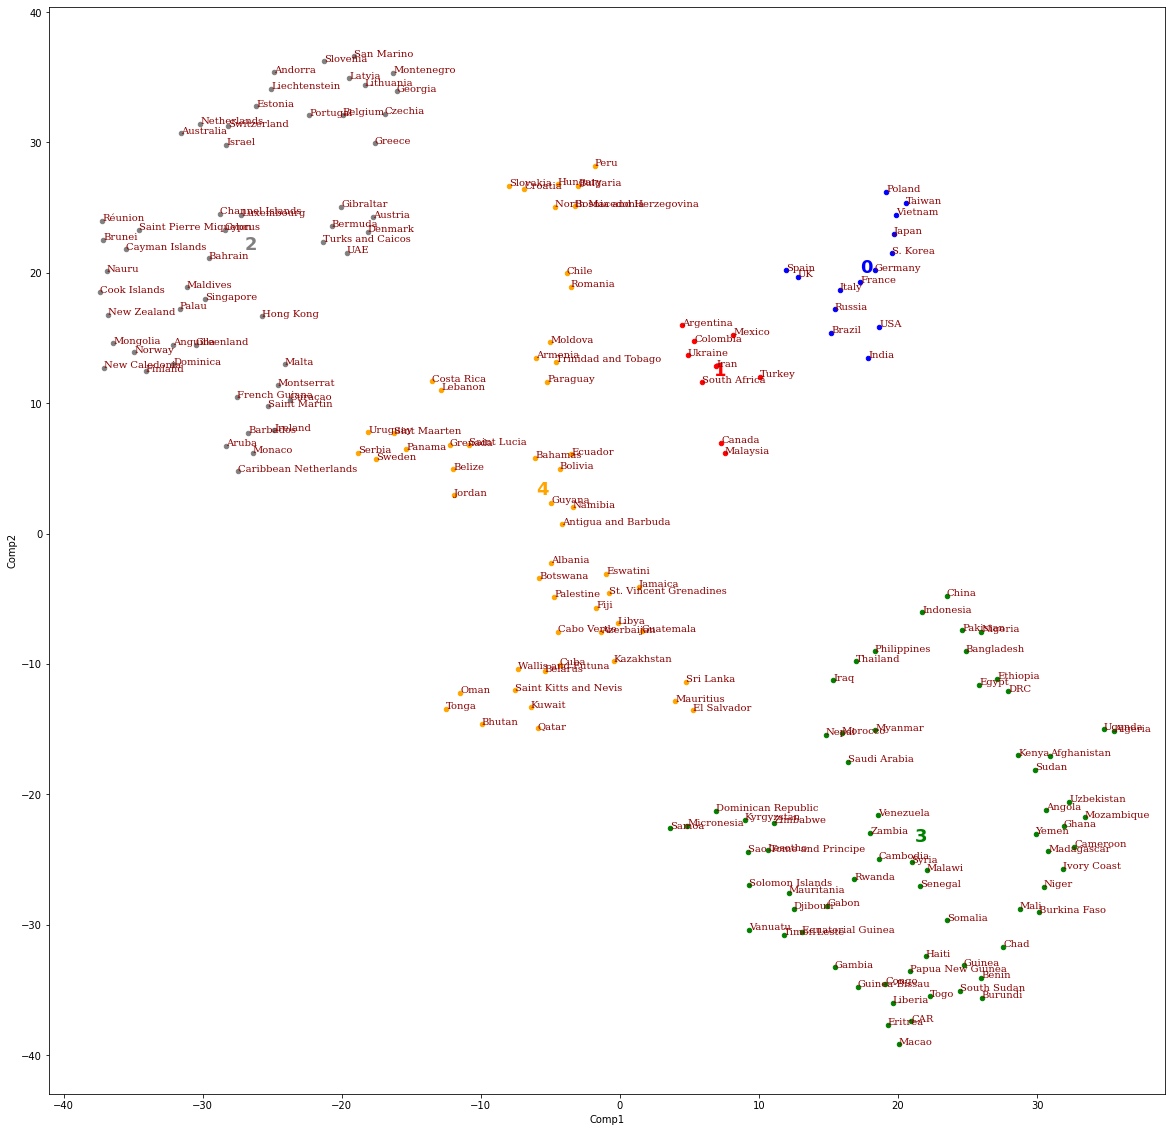

In [99]:
#--------------------------------------------------------
# Plot scatter labels identifying clusters
#--------------------------------------------------------
df_dbscan = pd.DataFrame(data=arr_tsne, columns=['Comp1', 'Comp2'])
df_dbscan['label'] = dbscan.labels_

fig, ax = plt.subplots(1, figsize=(20,20))
dict_color = {0:'blue', 1:'red', 2:'grey', 3:'green', 4:'orange'}
font_label = {
    "family": "serif",
    "color": "darkred",
    "weight": "normal",
    "size": 10,
}
for label in df_dbscan['label'].unique():
    df_cluster = df_dbscan[df_dbscan['label']==label]
    xmean = df_cluster['Comp1'].mean()    
    ymean = df_cluster['Comp2'].mean()    
    ax=df_cluster.plot.scatter(x='Comp1'
                     , y='Comp2'
                     , ax=ax
                     , c=dict_color[label])
    ax.text(xmean
         , ymean
         , str(label)
        , color='black'
         , fontdict={'weight': 'bold', 'size': 18, 'c':dict_color[label]})
    for index in df_cluster.index: 
        x, y = df_cluster.loc[index]['Comp1'], df_cluster.loc[index]['Comp2']
        ax.text(x
                , y
                , ser_country.loc[index]
                , fontdict=font_label)
_=plt.show()